# OKCupid - Date-a-Scientist

The project has been compiled as a part of the Codecademy Data Science Machine Learning career path. Codecademy provided the dataset. **Goals and methods are my own**.

## Introduction

The following dataset - ***profiles.csv*** - contains entries with personal profiles of nearly 60k individuals. Each entry involves the following information:
* **body_type**
* **diet**
* **drinks**
* **drugs**
* **education**
* **ethnicity**
* **height**
* **income**
* **job**
* **offspring**
* **orientation**
* **pets**
* **religion**
* **sex**
* **sign**
* **smokes**
* **speaks**
* **status**


Additionaly, each profile involves several short answer responses:
* **essay0** - *My self-summary*
* **essay1** - *What I’m doing with my life*
* **essay2** - *I’m really good at…*
* **essay3** - *The first thing people usually notice about me…*
* **essay4** - *Favorite books, movies, show, music, and food*
* **essay5** - *The six things I could never do without*
* **essay6** - *I spend a lot of time thinking about…*

## Exploratory Data Analysis

The goal of the EDA is to understand the dataset, clean it from unnecessary or illogical inputs, and compile a statistical analysis. Questions to answer in the statistical analysis would be determined later, when the data has been more deeply understood.

In [1]:
# import statistical libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
# Show unique values of features
profiles_df = pd.read_csv("profiles.csv")

#essays_df = profiles_df[["essay0", "essay1", "essay2", "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", "essay9"]]
#demographics_df = profiles_df.drop(labels=["essay0", "essay1", "essay2", "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", "essay9"], axis=1)

profiles_df.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

In [3]:
for feature in profiles_df.columns:
    if feature[:-1] != "essay":
        print("The following are possible values of the {} feature".format(feature.upper()))
        print(profiles_df[feature].unique())
        print("\n")

The following are possible values of the AGE feature
[ 22  35  38  23  29  32  31  24  37  28  30  39  33  26  27  20  25  40
  36  21  34  43  46  41  42  45  18  55  50  59  44  48  54  51  62  52
  19  58  66  53  63  47  49  61  60  57  56  65  64  68 110  69  67 109]


The following are possible values of the BODY_TYPE feature
['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']


The following are possible values of the DIET feature
['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']


The following are possible values of the DRINKS feature
['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']


The following are possible values of the DRUGS feature
['nev

In [4]:
# Show number of missing values per feature
number_all = len(profiles_df.index)
for feature in profiles_df.columns:
    number_missing = profiles_df[feature].isnull().sum()
    percent_missing = round(number_missing / number_all * 100, 1)
    print("The feature {} has {} missing values which make up {} %.".format(feature.upper(), number_missing, percent_missing))

The feature AGE has 0 missing values which make up 0.0 %.
The feature BODY_TYPE has 5296 missing values which make up 8.8 %.
The feature DIET has 24395 missing values which make up 40.7 %.
The feature DRINKS has 2985 missing values which make up 5.0 %.
The feature DRUGS has 14080 missing values which make up 23.5 %.
The feature EDUCATION has 6628 missing values which make up 11.1 %.
The feature ESSAY0 has 5488 missing values which make up 9.2 %.
The feature ESSAY1 has 7572 missing values which make up 12.6 %.
The feature ESSAY2 has 9638 missing values which make up 16.1 %.
The feature ESSAY3 has 11476 missing values which make up 19.1 %.
The feature ESSAY4 has 10537 missing values which make up 17.6 %.
The feature ESSAY5 has 10850 missing values which make up 18.1 %.
The feature ESSAY6 has 13771 missing values which make up 23.0 %.
The feature ESSAY7 has 12451 missing values which make up 20.8 %.
The feature ESSAY8 has 19225 missing values which make up 32.1 %.
The feature ESSAY9 has 1

In [5]:
# Functions to explore features individually
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i]) 

def eda_numerical(df, feature, bins=30):
    column = df[feature].dropna()

    mean = round(column.mean(), 1)
    median = round(column.median(), 1)
    maximum = column.max()
    minimum = column.min()

    # Define figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Histogram of {feature.upper()}")

    # Full data
    ax1.hist(column, bins=bins, color="steelblue", edgecolor="black")
    ax1.set_title("Full distribution")
    ax1.set_xlabel(feature)
    ax1.set_ylabel("Count")

    # Data clipped to 95th percentile
    perc95 = np.percentile(column, 95)
    ax2.hist(column[column <= perc95], bins=bins, color="seagreen", edgecolor="black")
    ax2.set_title(f"Up to 95th percentile (≤ {perc95:.2f})")
    ax2.set_xlabel(feature)
    ax2.set_ylabel("Count")

    plt.tight_layout()
    plt.show()
    plt.close()

    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Max: {maximum}")
    print(f"Min: {minimum}")

def eda_categorical(df, feature, category_order=None):
    column = df[feature]

    # Reorder if user specifies, otherwise default (descending counts)
    if category_order is not None:
        counts = column.value_counts(dropna=False).reindex(category_order, fill_value=0)
        percentages = column.value_counts(dropna=False, normalize=True).reindex(category_order, fill_value=0)
    else:
        counts = column.value_counts(dropna=False)
        percentages = column.value_counts(dropna=False, normalize=True)

    colors = [(1,0.3,0.3) if pd.isna(cat) else (0,0,1) for cat in counts.index]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f"Counts of unique {feature.upper()} categories")

    # Left: counts
    ax1.bar(counts.index.astype(str), counts.values, color=colors)
    ax1.set_xlabel(feature)
    ax1.set_ylabel("Count")
    ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")

    # Right: percentages
    bars = ax2.bar(percentages.index.astype(str), percentages.values * 100, color=colors)
    ax2.set_xlabel(feature)
    ax2.set_ylabel("Percentage (%)")
    ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")

    # Annotate percentages above bars
    for bar, perc in zip(bars, percentages.values * 100):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 f"{perc:.1f}%", ha="center", va="bottom")

    plt.tight_layout()
    plt.show()
    plt.close()

    print(counts)

### Cleaning the Data
In the following section, we will go through each individual feature and:
1. see their possible values and distribution
2. remove non-sensical values
3. merge existing categories into fewer categories

After each feature has been cleaned, next step will be to look at the dataset as a whole and to peform further preprocessing. That means:
1. seeing, and removing rows of data with *too many* missing values
2. determining which relationships are worth exploring further in the following chapter - statistical analysis

#### By Feature

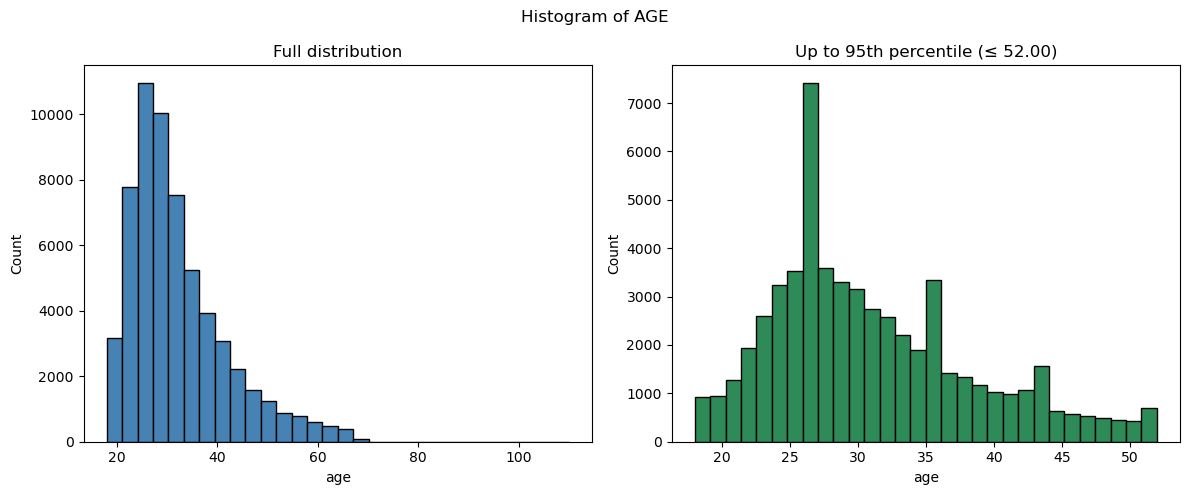

Mean: 32.3
Median: 30.0
Max: 110
Min: 18


In [6]:
# age feature - exploratory analysis and cleaning
eda_numerical(profiles_df, "age")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


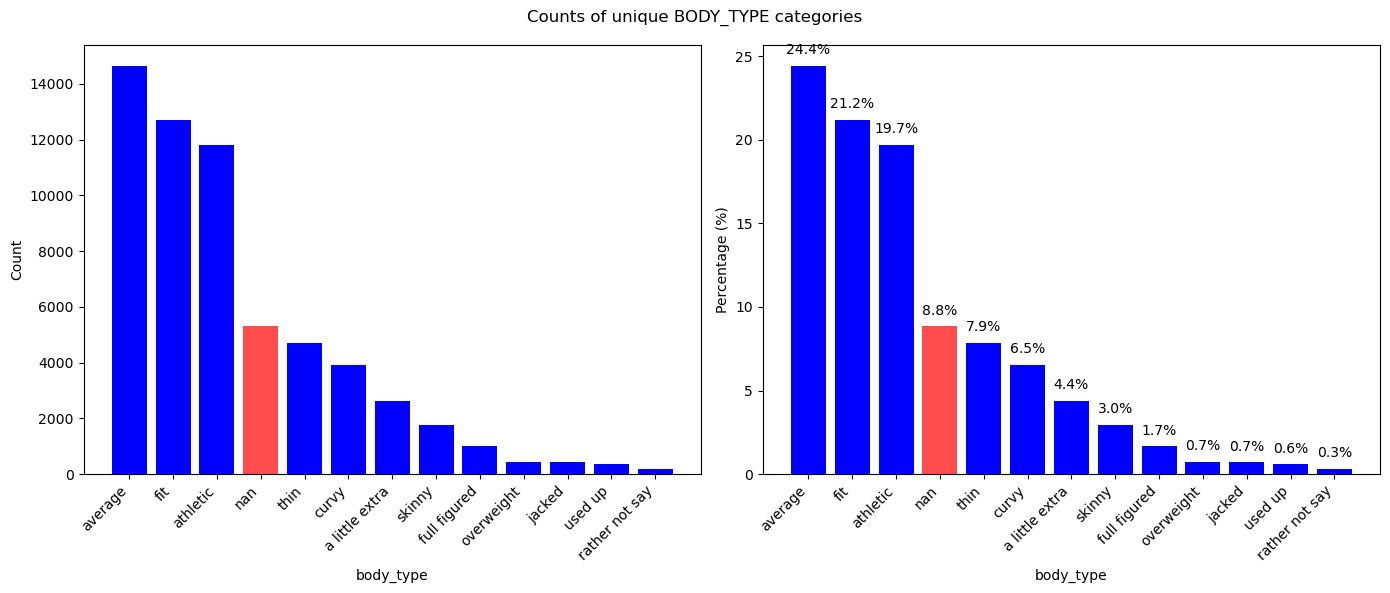

body_type
average           14652
fit               12711
athletic          11819
NaN                5296
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64


In [7]:
# body_type feature - exploratory analysis and cleaning
eda_categorical(profiles_df, "body_type")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


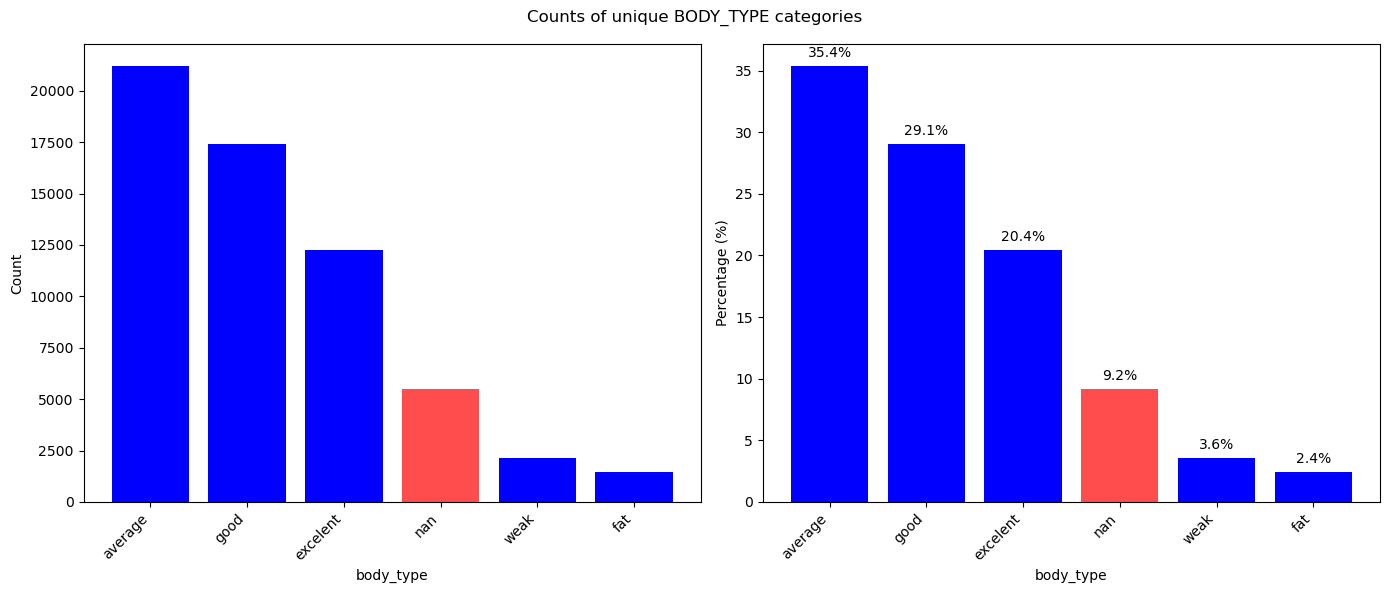

body_type
average     21205
good        17422
excelent    12240
NaN          5494
weak         2132
fat          1453
Name: count, dtype: int64


In [8]:
# body_type feature - cleaning
# reduce number of categories
new2old_cat = {np.nan :("rather not say", np.nan), 
               "fat":("overweight", "full figured", "fat"),
               "weak": ("used up", "skinny", "weak"),
               "average": ("average", "curvy", "a little extra", "average"), 
               "good":("fit", "thin", "good"), 
               "excelent":("athletic", "jacked", "excelent")}
old2new_cat = {old: new for new,olds in new2old_cat.items() for old in olds}

profiles_df["body_type"] = profiles_df["body_type"].map(old2new_cat)

eda_categorical(profiles_df, "body_type")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


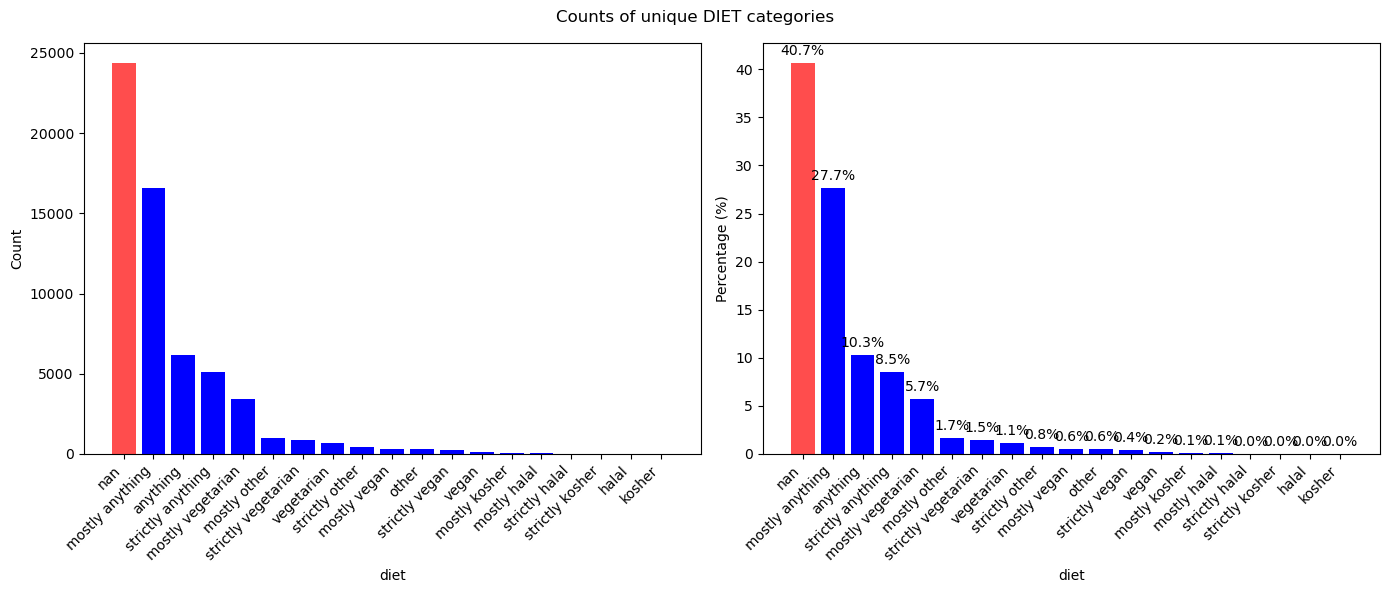

diet
NaN                    24395
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: count, dtype: int64


In [9]:
# diet feature - exploratory analysis
eda_categorical(profiles_df, "diet")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


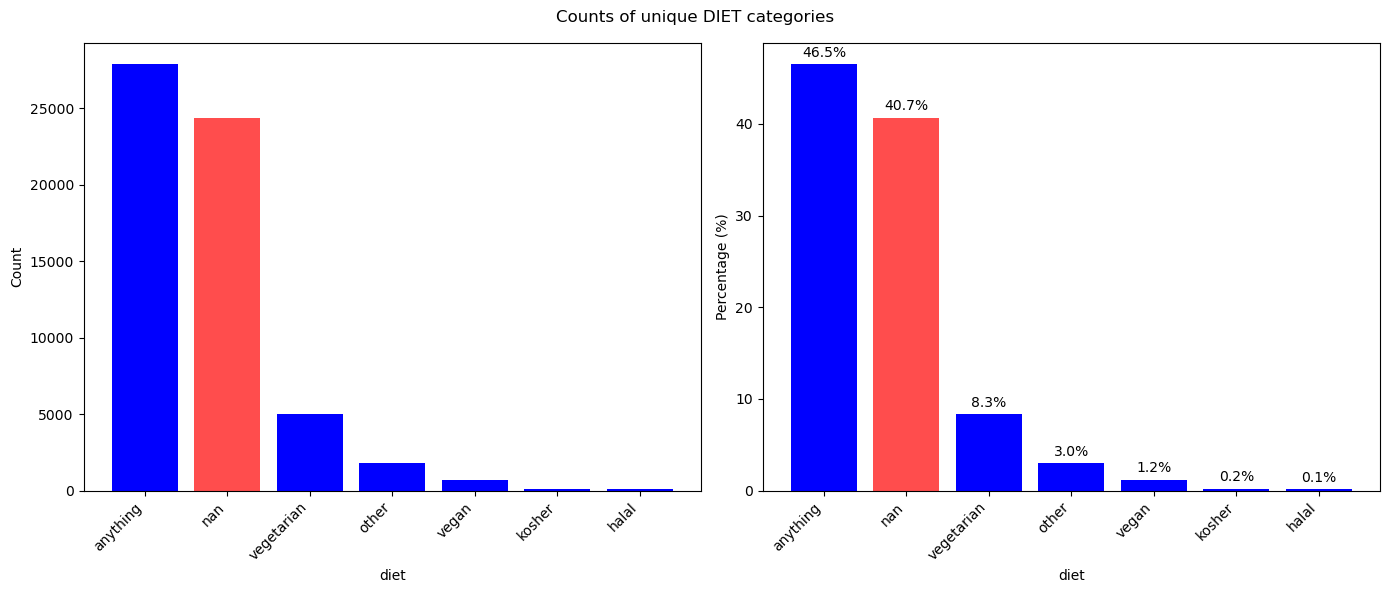

diet
anything      27881
NaN           24395
vegetarian     4986
other          1790
vegan           702
kosher          115
halal            77
Name: count, dtype: int64


In [10]:
# diet feature - cleaning
new2old_cat = {"anything":("mostly anything", "anything", "strictly anything"),
               "vegetarian":("mostly vegetarian", "strictly vegetarian", "vegetarian"),
               "vegan":("mostly vegan", "strictly vegan", "vegan"),
               "halal":("mostly halal", "strictly halal", "halal"),
               "kosher":("mostly kosher", "strictly kosher", "kosher"),
               "other":("mostly other", "strictly other", "other")}
old2new_cat = {old: new for new,olds in new2old_cat.items() for old in olds}

profiles_df["diet"] = profiles_df["diet"].map(old2new_cat)

eda_categorical(profiles_df, "diet")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


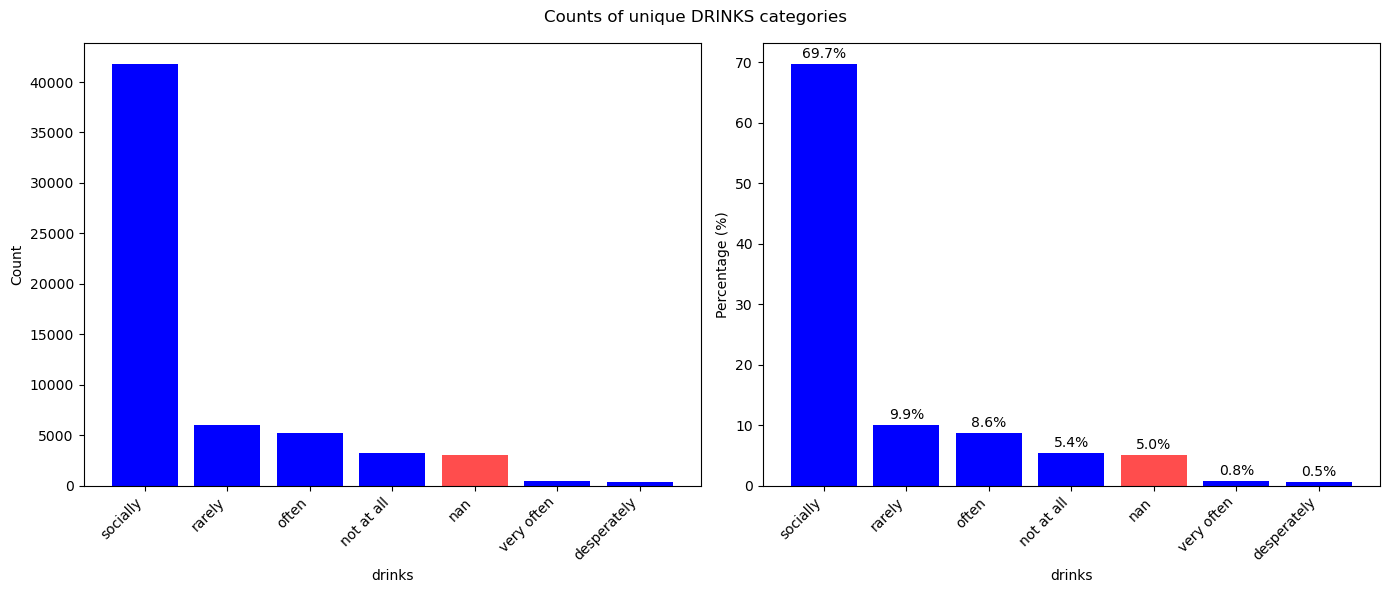

drinks
socially       41780
rarely          5957
often           5164
not at all      3267
NaN             2985
very often       471
desperately      322
Name: count, dtype: int64


In [11]:
# drinks feature - exploratory analysis and cleaning
# no cleaning needed
eda_categorical(profiles_df, "drinks")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


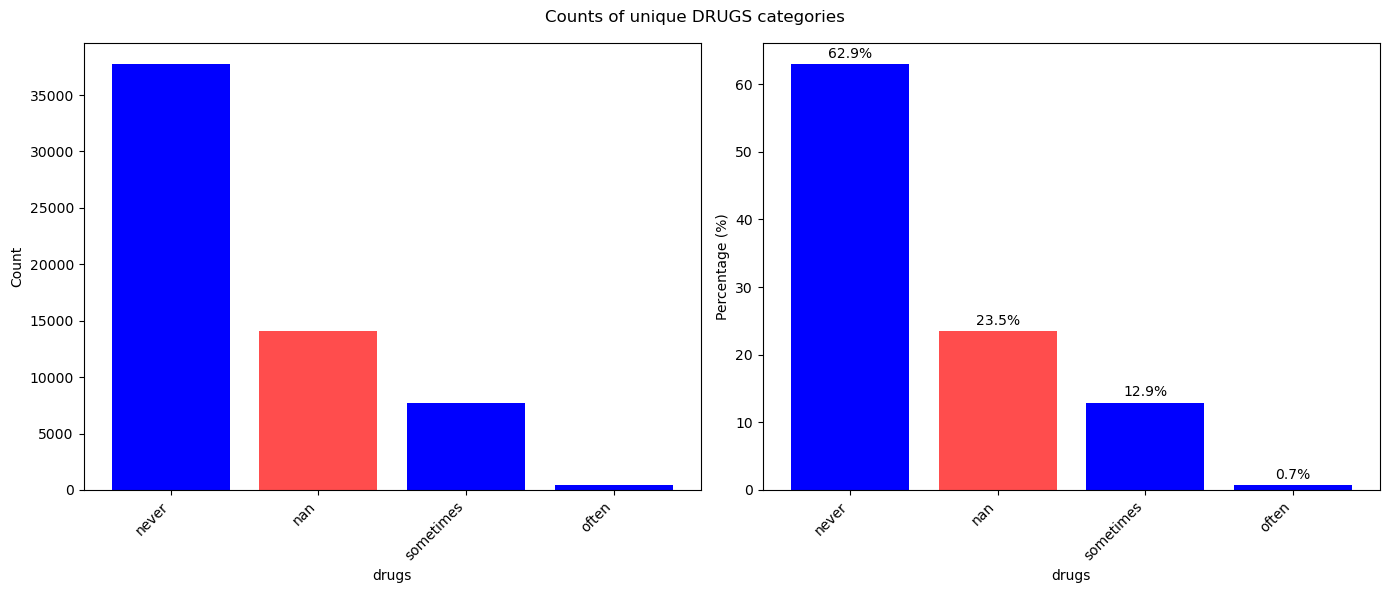

drugs
never        37724
NaN          14080
sometimes     7732
often          410
Name: count, dtype: int64


In [12]:
# drugs feature - exploratory analysis and cleaning
eda_categorical(profiles_df, "drugs")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


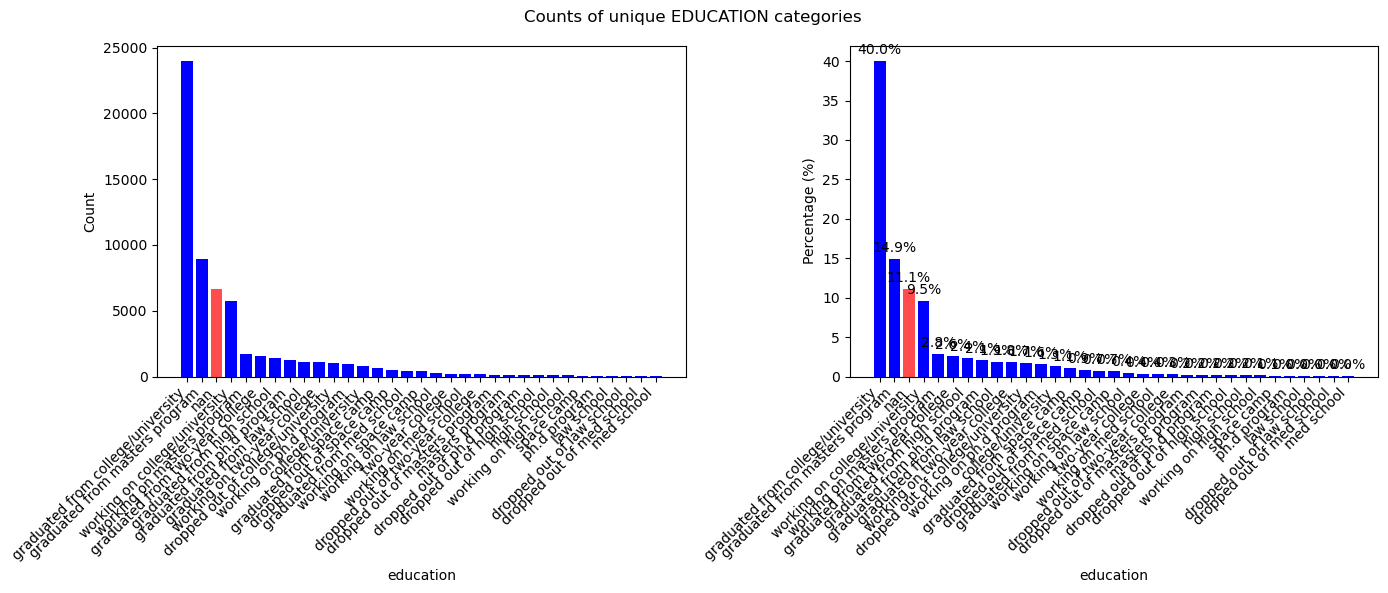

education
graduated from college/university    23959
graduated from masters program        8961
NaN                                   6628
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
d

In [13]:
# education feature - exploratory analysis
eda_categorical(profiles_df, "education")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


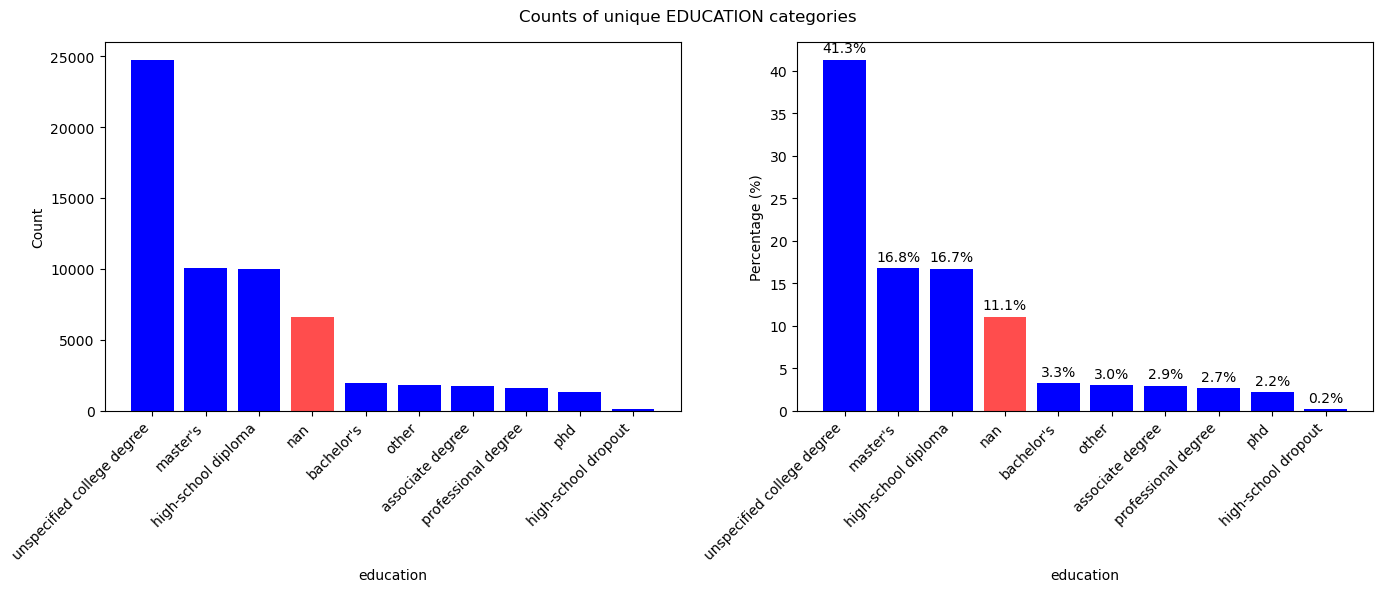

education
unspecified college degree    24760
master's                      10071
high-school diploma           10007
NaN                            6628
bachelor's                     1959
other                          1770
associate degree               1753
professional degree            1598
phd                            1298
high-school dropout             102
Name: count, dtype: int64


In [14]:
# education feature - cleaning
new2old_cat = {"high-school dropout":("dropped out of high school", "high-school dropout"),
               "high-school diploma":("working on college/university", "graduated from high school", "working on two-year college",
                                      "dropped out of college/university", "dropped out of space camp", "working on law school",
                                      "working on med school", "dropped out of two-year college", "high school", "dropped out of law school",
                                      "dropped out of med school", "high-school diploma"),
               "other":("graduated from space camp", "working on space camp", "dropped out of space camp", "working on high school", 
                        "space camp", "other"),
               "associate degree":("graduated from two-year college", "two-year college", "associate degree"),
               "bachelor's":("working on masters program", "dropped out of masters program", "masters program", "bachelor's"),
               "master's":("graduated from masters program", "working on ph.d program","dropped out of ph.d program", "master's"),
               "professional degree":("graduated from law school", "graduated from med school", "law school", "med school", "professional degree"),
               "phd":("graduated from ph.d program", "ph.d program", "phd"),
               "unspecified college degree":("graduated from college/university", "college/university", "unspecified college degree")}
old2new_cat = {old: new for new,olds in new2old_cat.items() for old in olds}

profiles_df["education"] = profiles_df["education"].map(old2new_cat)

eda_categorical(profiles_df, "education")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


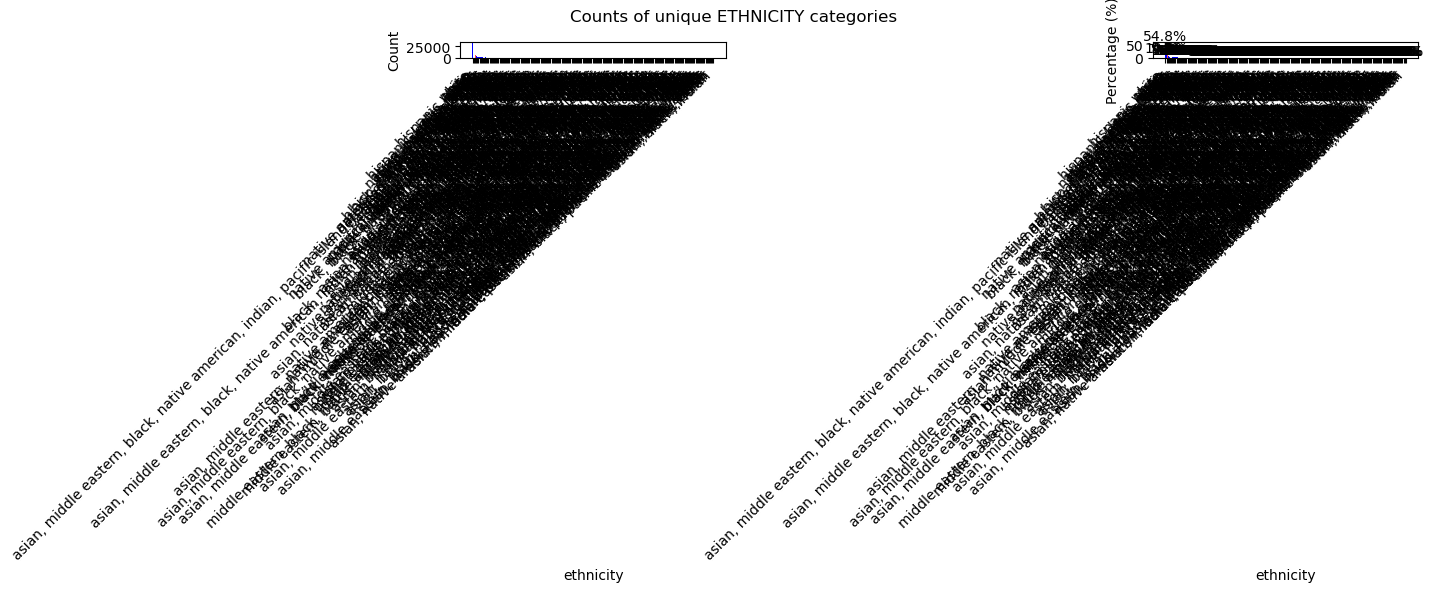

ethnicity
white                                                                               32831
asian                                                                                6134
NaN                                                                                  5680
hispanic / latin                                                                     2823
black                                                                                2008
                                                                                    ...  
asian, black, pacific islander, hispanic / latin, white                                 1
asian, native american, indian, pacific islander, hispanic / latin, white, other        1
asian, middle eastern, black, pacific islander, hispanic / latin                        1
asian, black, pacific islander, white, other                                            1
asian, black, indian                                                                    1


In [15]:
# ethnicity feature - exploratory analysis
eda_categorical(profiles_df, "ethnicity")

{'white': 'white', 'black': 'black', 'hispanic / latin': 'hispanic/latino', 'hispanic': 'hispanic/latino', 'hispanic/latino': 'hispanic/latino', 'asian': 'asian', 'indian': 'asian', 'middle eastern': 'middle eastern', 'native american': 'native american', 'pacific islander': 'pacific islander', 'other': 'other'}


C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


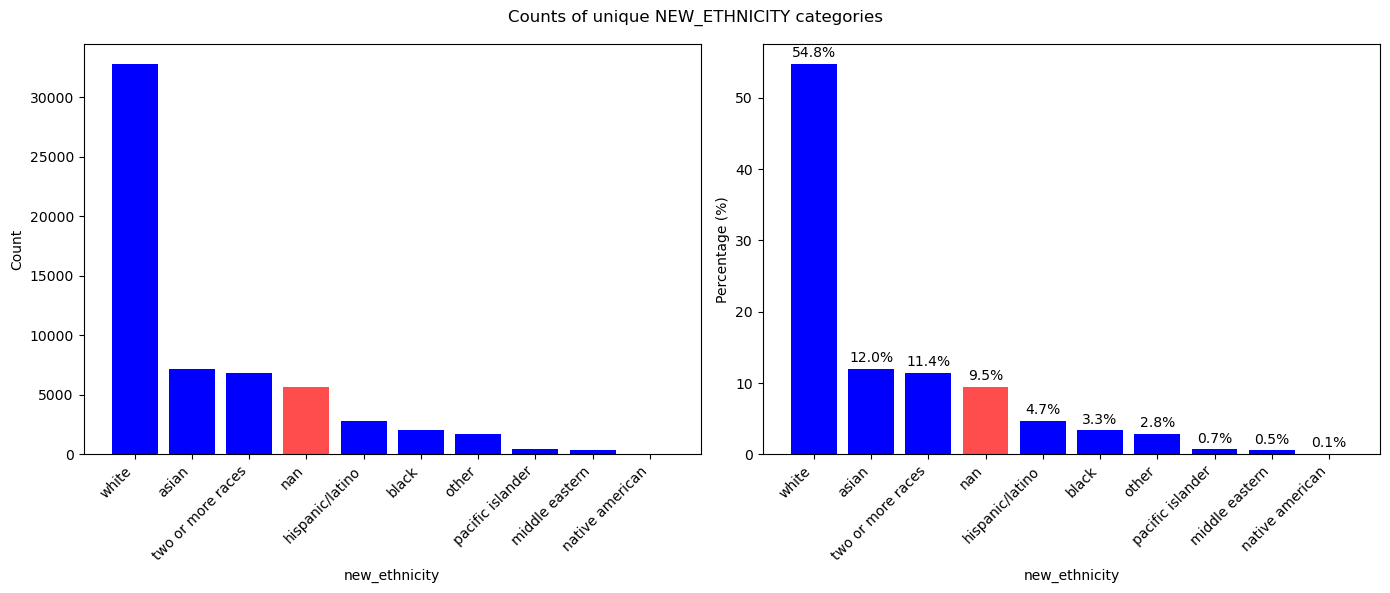

new_ethnicity
white                32831
asian                 7211
two or more races     6859
NaN                   5680
hispanic/latino       2823
black                 2008
other                 1706
pacific islander       432
middle eastern         329
native american         67
Name: count, dtype: int64


In [16]:
# ethnicity feature - cleaning
ethnicities_set = set()
for individual_ethnicity in profiles_df["ethnicity"]:
    #ethnicities_set.add(individual_ethnicity)
    if pd.notna(individual_ethnicity):
        ethnicities_list = individual_ethnicity.split(", ")
        for eth in ethnicities_list:
            ethnicities_set.add(eth)
    else:
        ethnicities_set.add(individual_ethnicity)

# Option 1 - create 10 or 9 new dummy categories corresponding to the 9 ethnicities (+ 1 for missing)
# Option 2 - create new categories merging some of the ethnicities together based on a rule; categories selected according to US Census Bureau methodology
# DECISION: Go with O2 - O1 would be very information heavy, dummy variables may be created later if needed

new2old_cat = {"white":("white",),
               "black":("black",),
               "hispanic/latino":("hispanic / latin", "hispanic", "hispanic/latino"),
               "asian":("asian", "indian"),
               "middle eastern":("middle eastern",),
               "native american":("native american",),
               "pacific islander":("pacific islander",),
               "other":("other",)}
old2new_cat = {old: new for new,olds in new2old_cat.items() for old in olds}

print(old2new_cat)
def merge_ethnicities(ethnicities):
    #ethnicities = ethnicities[]
    if not pd.notna(ethnicities):
        return np.nan
    ethnicities_list = ethnicities.split(", ")
    if len(ethnicities_list) >= 2:
        return "two or more races"
    else:
        result = old2new_cat[ethnicities_list[0]]
        return result

profiles_df["new_ethnicity"] = profiles_df["ethnicity"].apply(merge_ethnicities)

eda_categorical(profiles_df, "new_ethnicity")

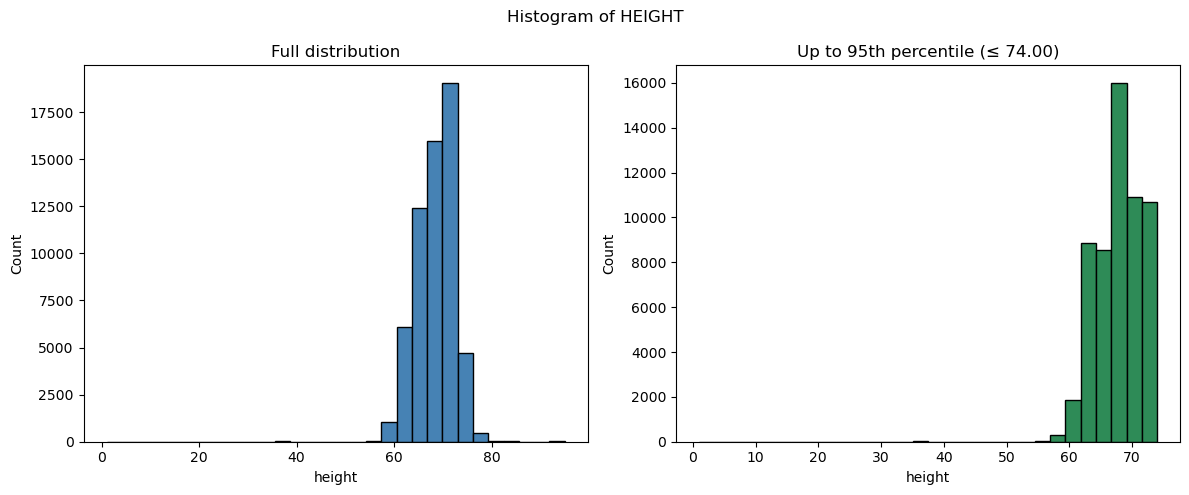

Mean: 68.3
Median: 68.0
Max: 95.0
Min: 1.0


In [17]:
# height feature - exploratory analysis
eda_numerical(profiles_df, "height")

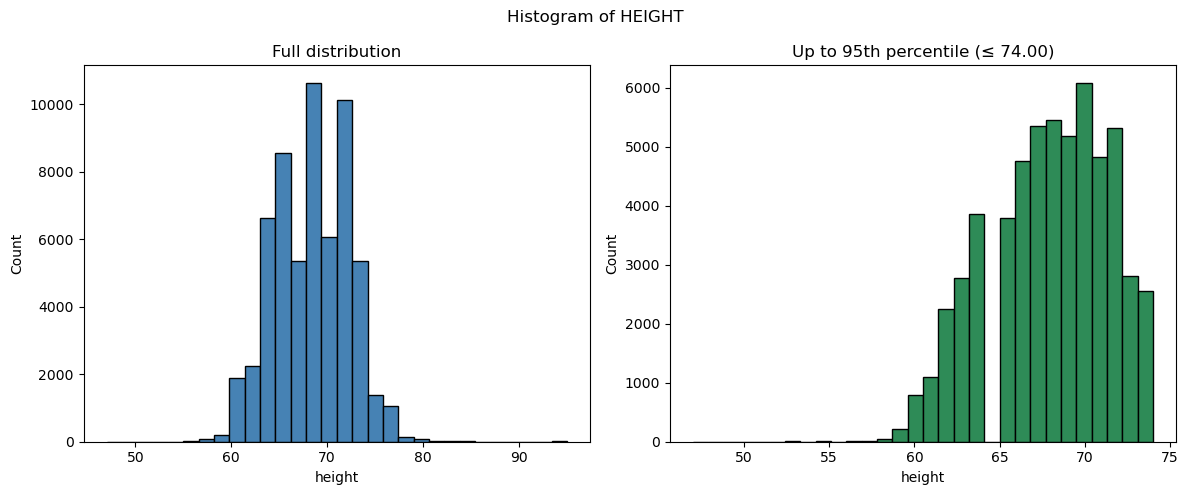

Mean: 68.3
Median: 68.0
Max: 95.0
Min: 47.0


In [18]:
# height feature - cleaning
# remove unreasonable values (below 45 in)
profiles_df.loc[profiles_df['height'] < 45,'height'] = np.nan

eda_numerical(profiles_df, "height")

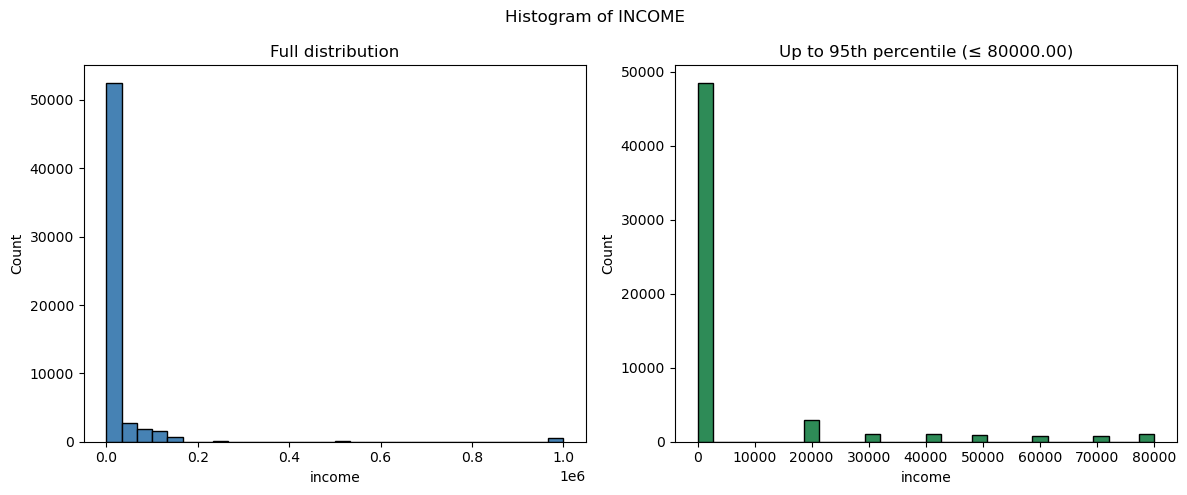

Mean: 20033.2
Median: -1.0
Max: 1000000
Min: -1


In [19]:
# income feature - exploratory analysis
eda_numerical(profiles_df, "income")

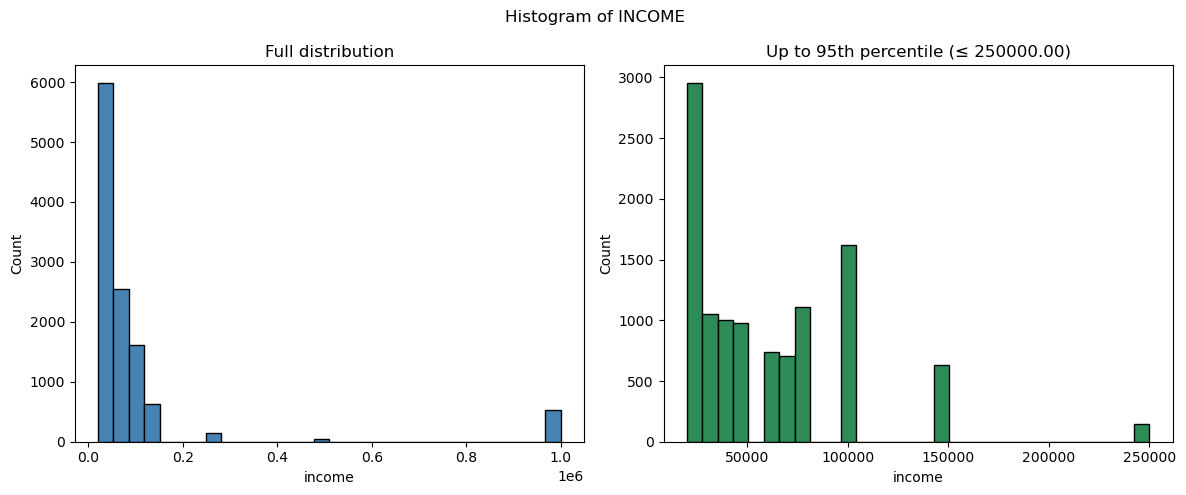

Mean: 104395.0
Median: 50000.0
Max: 1000000.0
Min: 20000.0


In [20]:
# income feature - cleaning
profiles_df["income"] = profiles_df["income"].replace(-1,np.nan)
eda_numerical(profiles_df, "income")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


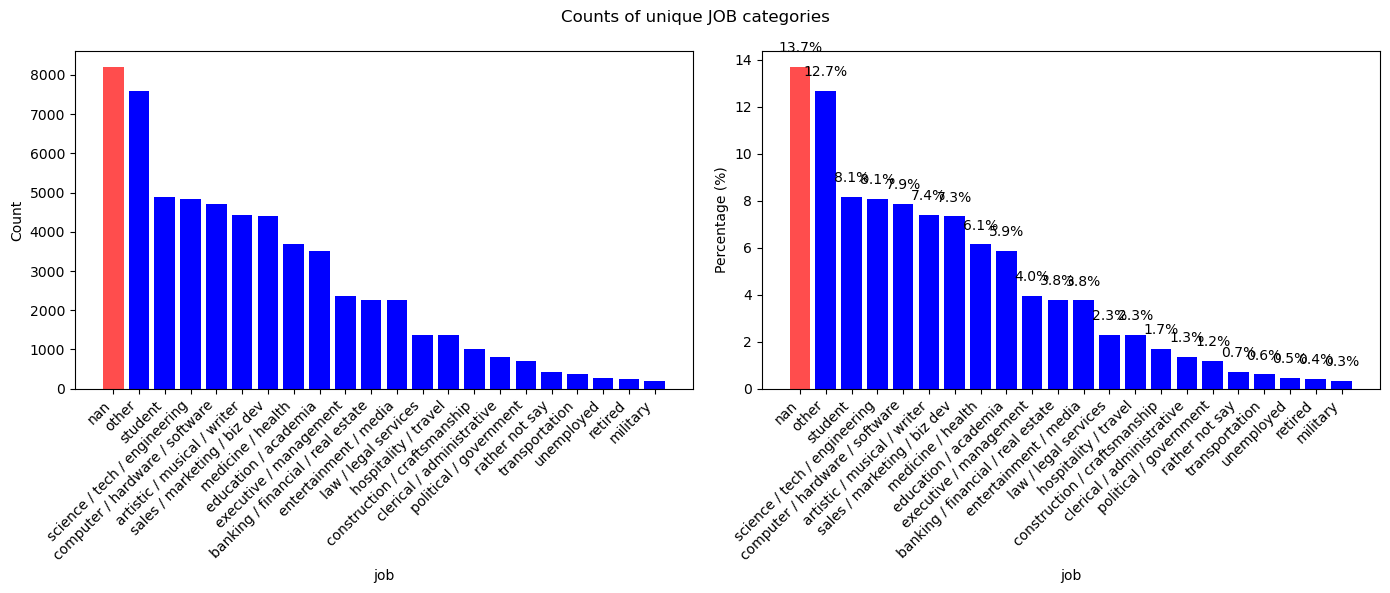

job
NaN                                  8198
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: count, dtype: int64


In [21]:
# job feature - exploratory analysis and cleaning
eda_categorical(profiles_df, "job")

In [22]:
# last_online feature - exploratory analysis
# too many values to visualize using eda_categorical()
# the last_online feature contains the date (YEAR-MONTH-DAY-hour-minute), when the user was online
# a new feature - days_since_last_online - would be created, which quantifies, how many days it has been since the user was last online  

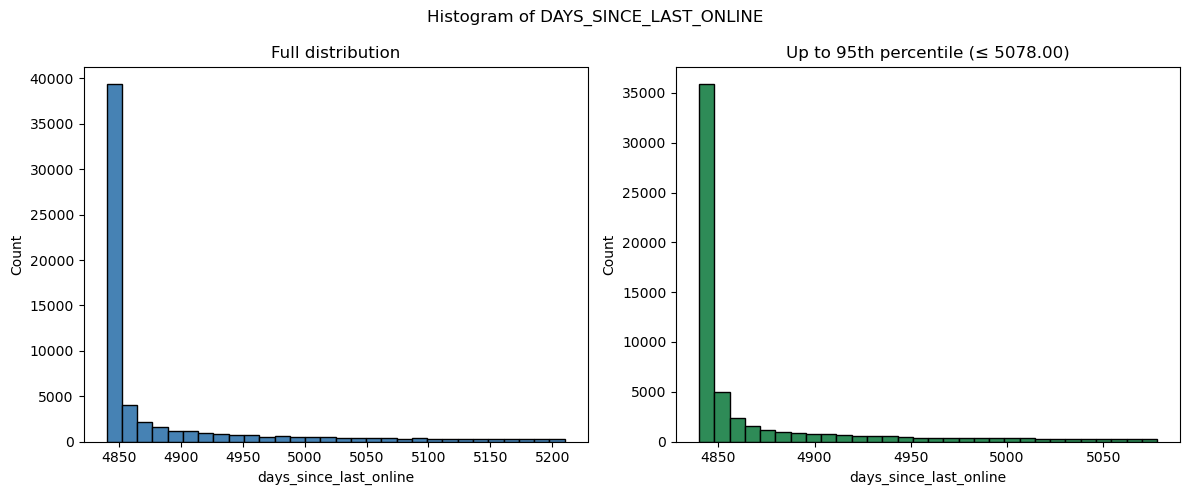

Mean: 4880.3
Median: 4844.0
Max: 5210
Min: 4840


np.int64(0)

In [23]:
# last_online feature - cleaning
from datetime import datetime

def days_since_last_online(last_date):
    if pd.isna(last_date):
        return np.nan
    
    date_list = last_date.split("-")[:3]
    last_date = "-".join(date_list)
    last_date = datetime.strptime(last_date, "%Y-%m-%d")

    current_time = datetime.now()
    today_date = "-".join([str(current_time.year), str(current_time.month), str(current_time.day)])
    today_date = datetime.strptime(today_date, "%Y-%m-%d")
    
    days_passed = (today_date - last_date).days
    return days_passed
    
profiles_df["days_since_last_online"] = profiles_df["last_online"].apply(days_since_last_online)
eda_numerical(profiles_df, "days_since_last_online")
profiles_df["last_online"].isna().sum()

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


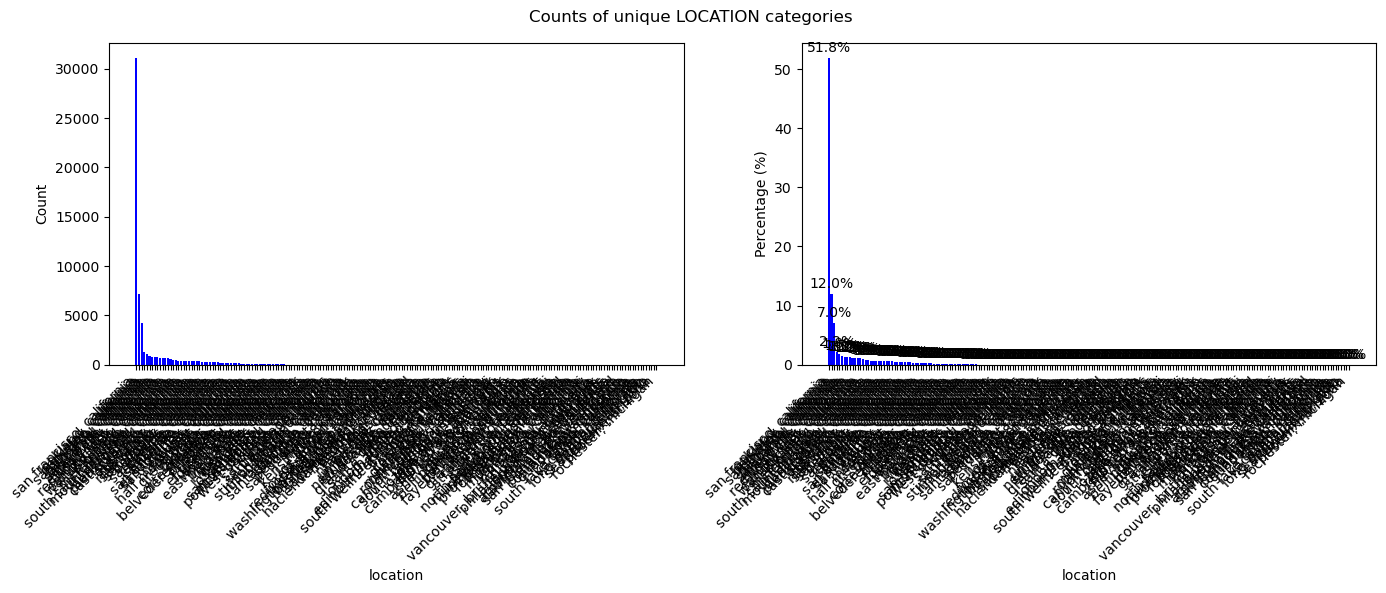

location
san francisco, california    31064
oakland, california           7214
berkeley, california          4212
san mateo, california         1331
palo alto, california         1064
                             ...  
denver, colorado                 1
seattle, washington              1
cincinnati, ohio                 1
phoenix, arizona                 1
rochester, michigan              1
Name: count, Length: 199, dtype: int64


In [24]:
# location feature - exploratory analysis and cleaning
# unchanged for now!
eda_categorical(profiles_df, "location")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


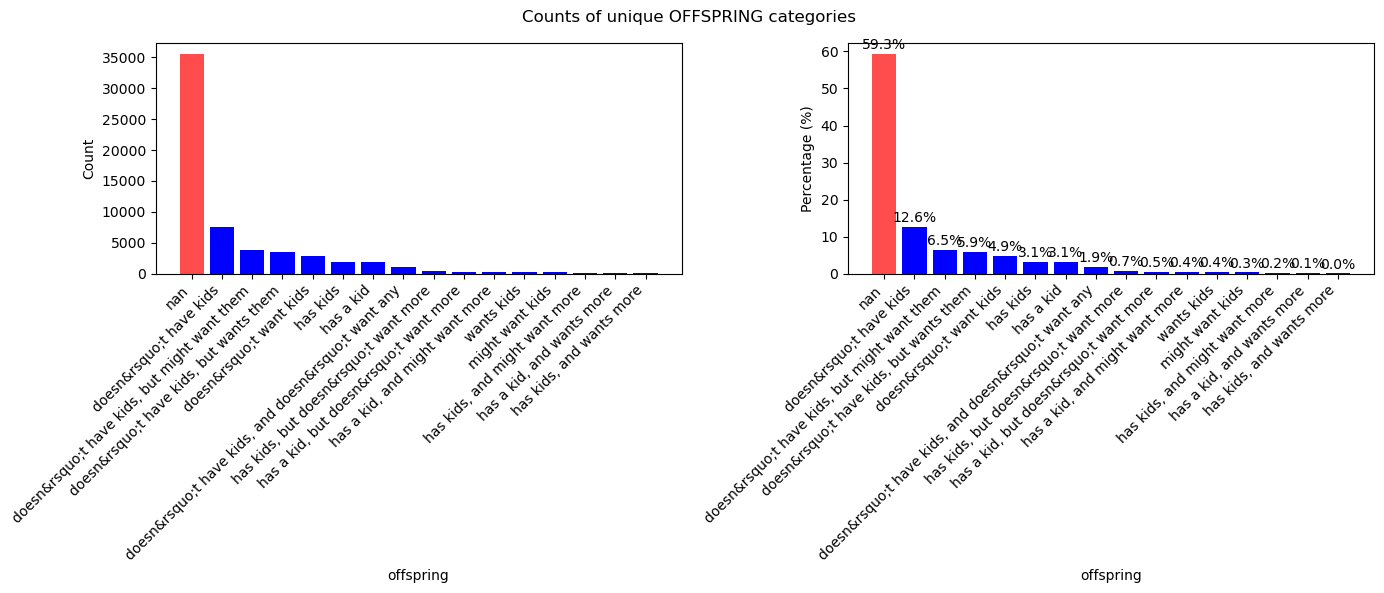

offspring
NaN                                                    35561
doesn&rsquo;t have kids                                 7560
doesn&rsquo;t have kids, but might want them            3875
doesn&rsquo;t have kids, but wants them                 3565
doesn&rsquo;t want kids                                 2927
has kids                                                1883
has a kid                                               1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any     1132
has kids, but doesn&rsquo;t want more                    442
has a kid, but doesn&rsquo;t want more                   275
has a kid, and might want more                           231
wants kids                                               225
might want kids                                          182
has kids, and might want more                            115
has a kid, and wants more                                 71
has kids, and wants more                                  21
Name: count, d

In [25]:
# offspring feature - exploratory analysis
eda_categorical(profiles_df, "offspring")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


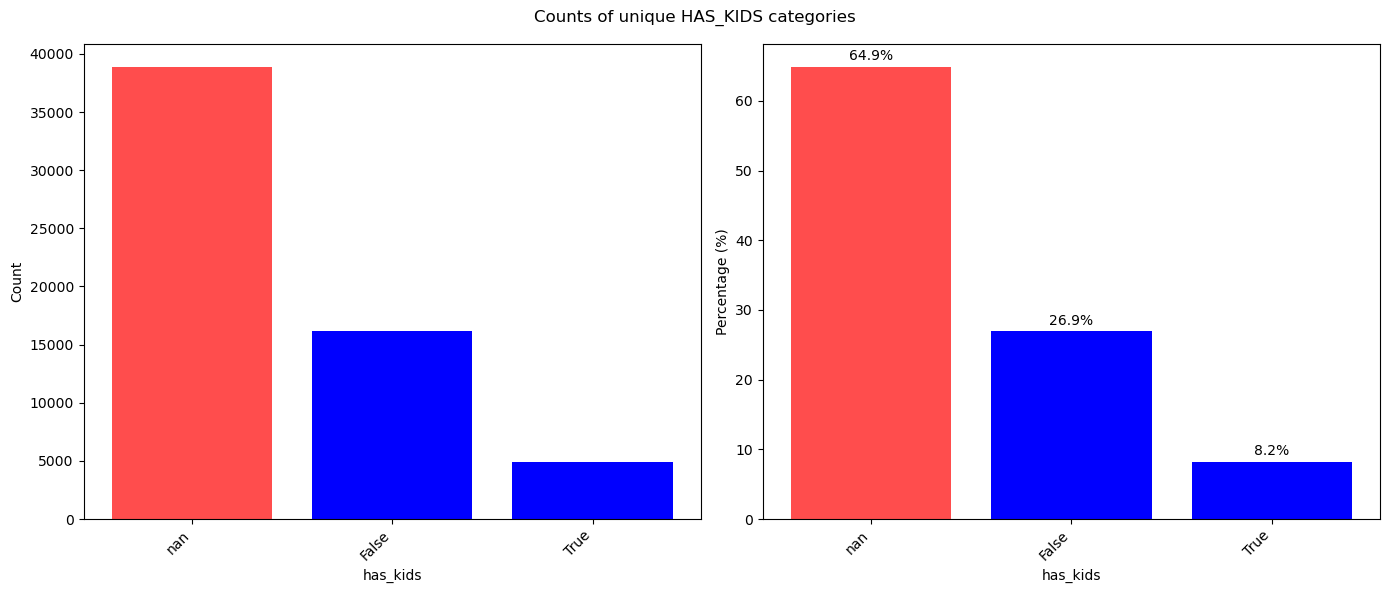

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


has_kids
NaN      38895
False    16132
True      4919
Name: count, dtype: int64


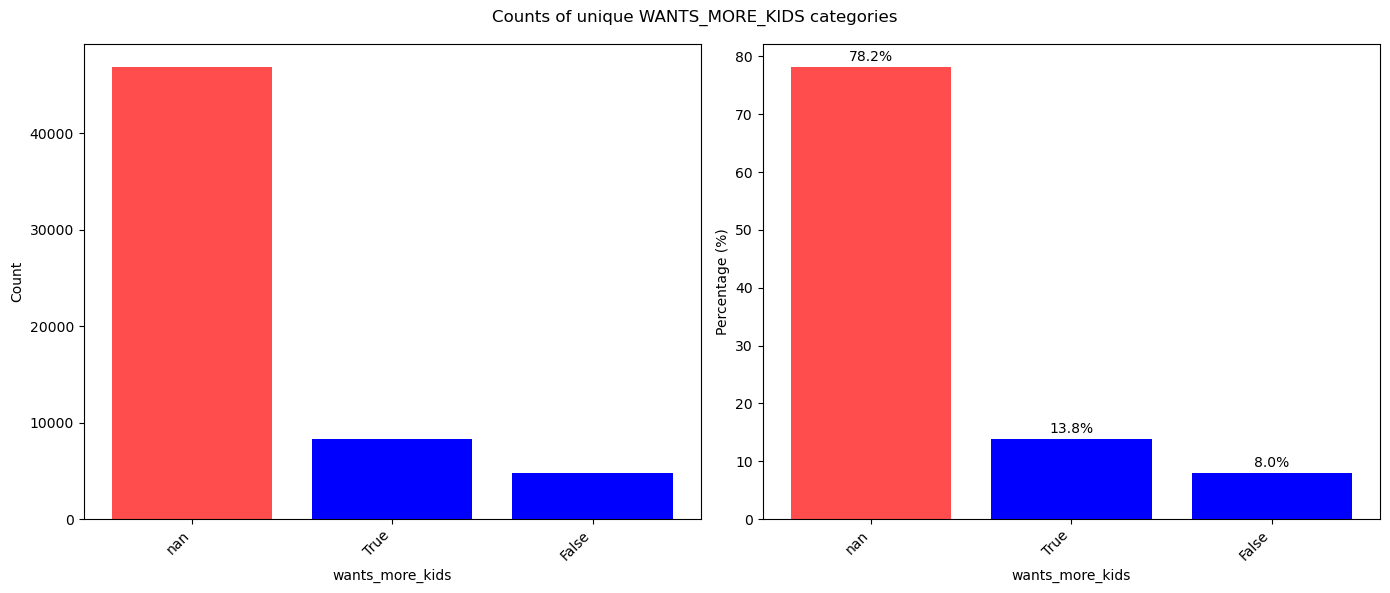

wants_more_kids
NaN      46885
True      8285
False     4776
Name: count, dtype: int64


In [26]:
# offspring feature - cleaning
# the feature will be transformed into two boolean featuers - has_kids, and wants_more_kids

def has_kids(record):
    if record in (True, False) or pd.isna(record):
        return record
    if record in ("has kids", "has a kid", "has kids, but doesn&rsquo;t want more", 
                     "has a kid, but doesn&rsquo;t want more", "has a kid, and might want more", 
                     "has kids, and might want more", "has a kid, and wants more", "has kids, and wants more"):
        return True
    elif record in ("doesn&rsquo;t have kids", "doesn&rsquo;t have kids, but might want them", 
                       "doesn&rsquo;t have kids, but wants them", "doesn&rsquo;t have kids, and doesn&rsquo;t want any"):
        return False
    else:
        return np.nan

def wants_more_kids(record):
    if record in (np.nan, True, False):
        return record
    if record in ("doesn&rsquo;t have kids, but might want them", "doesn&rsquo;t have kids, but wants them", 
                     "has a kid, and might want more", "wants kids", "might want kids", "has kids, and might want more", 
                     "has a kid, and wants more", "has kids, and wants more"):
        return True
    elif record in ("doesn&rsquo;t have kids, and doesn&rsquo;t want any", "has kids, but doesn&rsquo;t want more", 
                       "has a kid, but doesn&rsquo;t want more", "doesn&rsquo;t want kids"):
        return False
    else:
        return np.nan

profiles_df["has_kids"] = profiles_df["offspring"].apply(has_kids)
profiles_df["wants_more_kids"] = profiles_df["offspring"].apply(wants_more_kids)

eda_categorical(profiles_df, "has_kids")
eda_categorical(profiles_df, "wants_more_kids")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


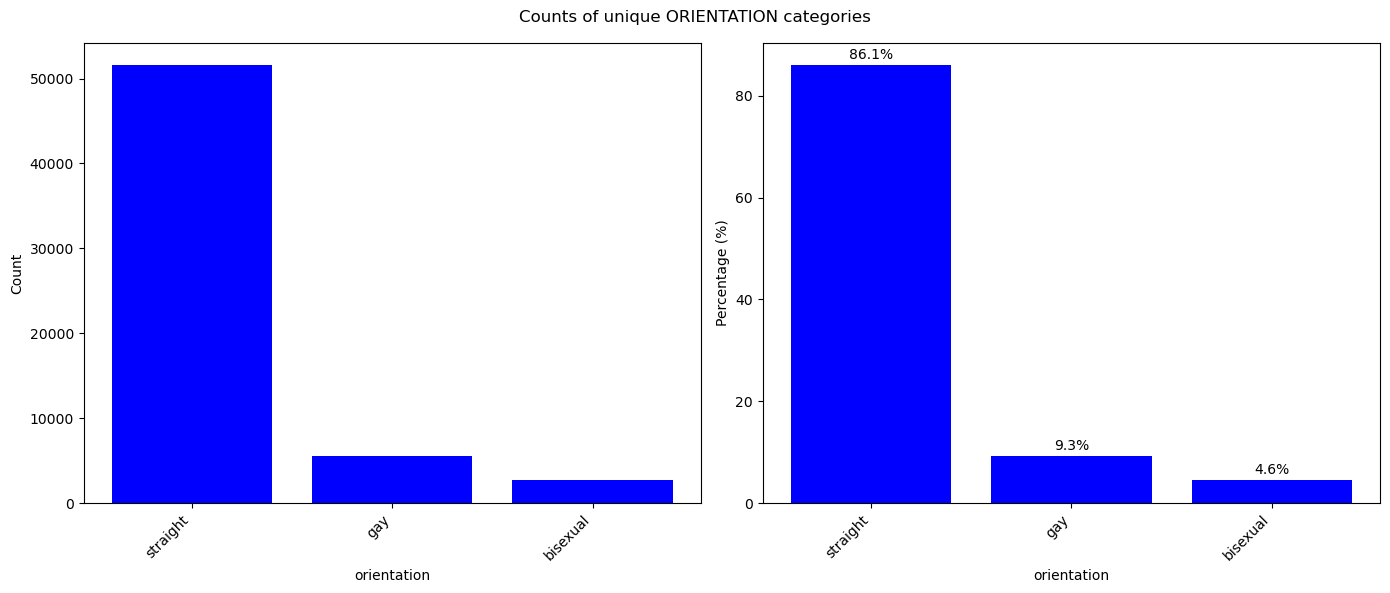

orientation
straight    51606
gay          5573
bisexual     2767
Name: count, dtype: int64


In [27]:
# orientation feature - exploratory analysis and cleaning
# perfect, no need to change
eda_categorical(profiles_df, "orientation")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


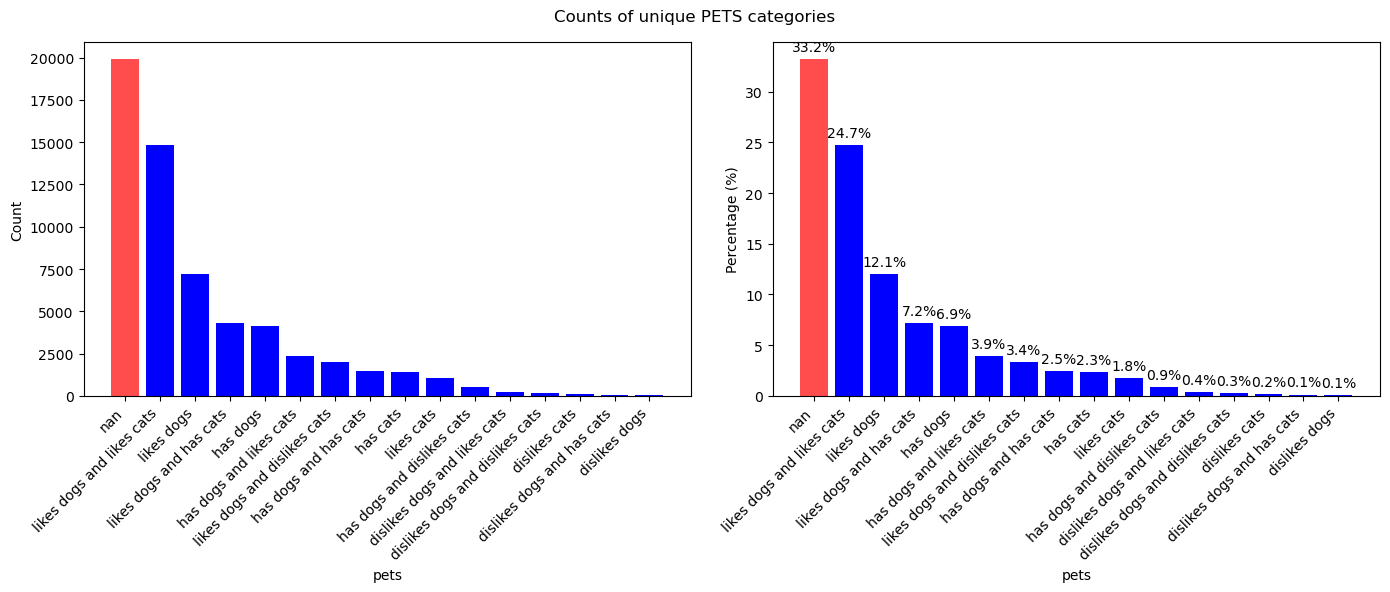

pets
NaN                                19921
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64


In [28]:
# pets feature - exploratory analysis
eda_categorical(profiles_df, "pets")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


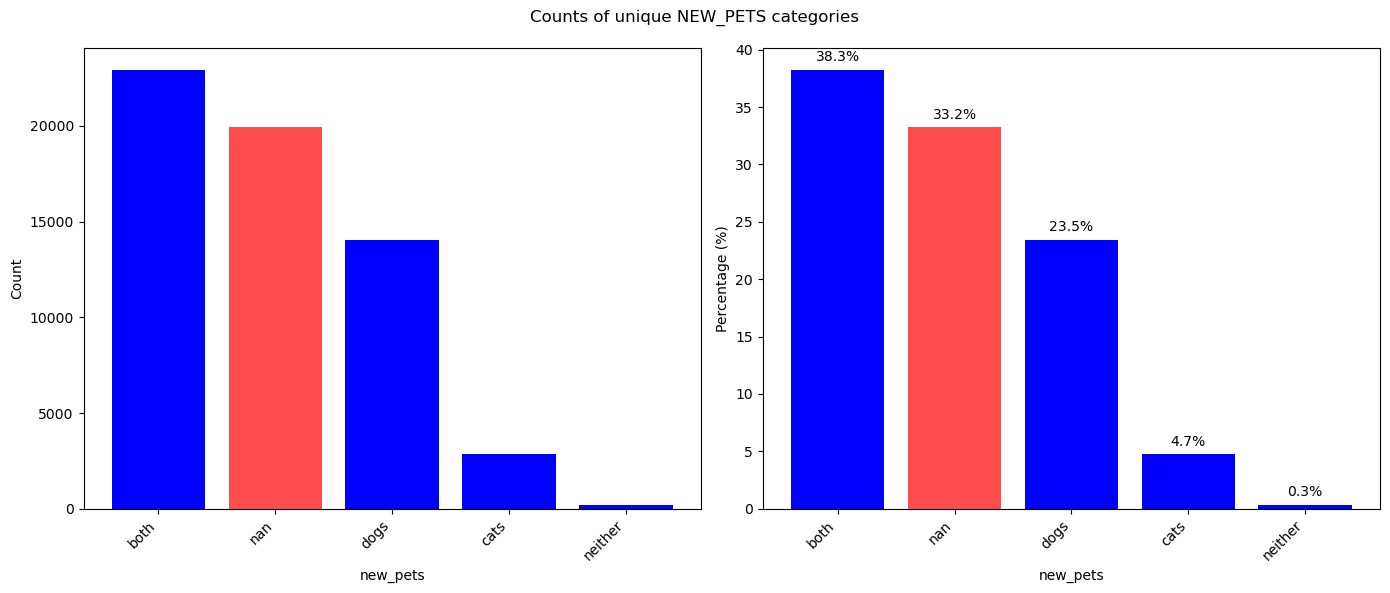

new_pets
both       22934
NaN        19921
dogs       14061
cats        2834
neither      196
Name: count, dtype: int64


In [29]:
# pets feature - cleaning
# In terms of matchmaking, it is (somewhat) important for the two to have common interests.
# Therefore, the categories will be reduced to the respondents' relationship to dogs or cats.
# DOGS OR CATS: dogs, cats, both, neither

new2old_cat = {"dogs":("likes dogs", "has dogs", "likes dogs and dislikes cats", "has dogs and dislikes cats", "dislikes cats"),
               "cats":("likes cats", "has cats", "dislikes dogs and likes cats", "dislikes dogs and has cats", "dislikes dogs"),
               "both":("likes dogs and likes cats", "likes dogs and has cats", "has dogs and likes cats", "has dogs and has cats"),
               "neither":("dislikes dogs and dislikes cats",)}
old2new_cat = {old: new for new,olds in new2old_cat.items() for old in olds}

profiles_df["new_pets"] = profiles_df["pets"].map(old2new_cat)

eda_categorical(profiles_df, "new_pets")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


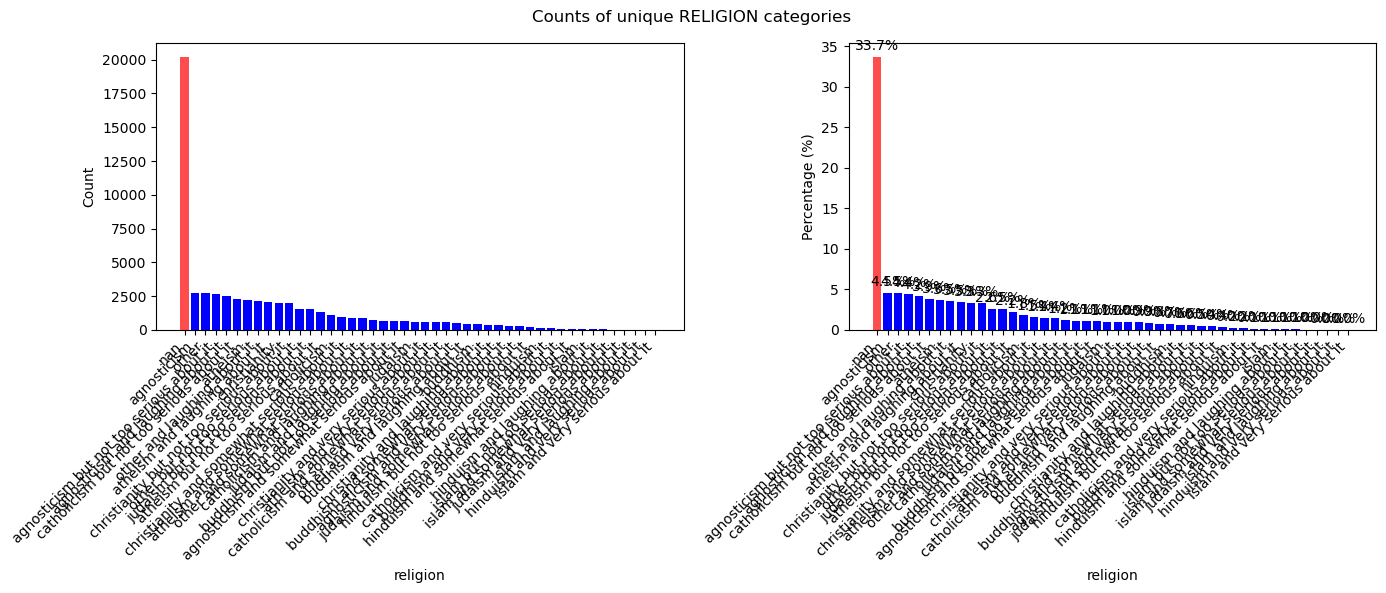

religion
NaN                                           20226
agnosticism                                    2724
other                                          2691
agnosticism but not too serious about it       2636
agnosticism and laughing about it              2496
catholicism but not too serious about it       2318
atheism                                        2175
other and laughing about it                    2119
atheism and laughing about it                  2074
christianity                                   1957
christianity but not too serious about it      1952
other but not too serious about it             1554
judaism but not too serious about it           1517
atheism but not too serious about it           1318
catholicism                                    1064
christianity and somewhat serious about it      927
atheism and somewhat serious about it           848
other and somewhat serious about it             846
catholicism and laughing about it               726
jud

In [30]:
# religion feature - exploratory analysis
eda_categorical(profiles_df, "religion")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


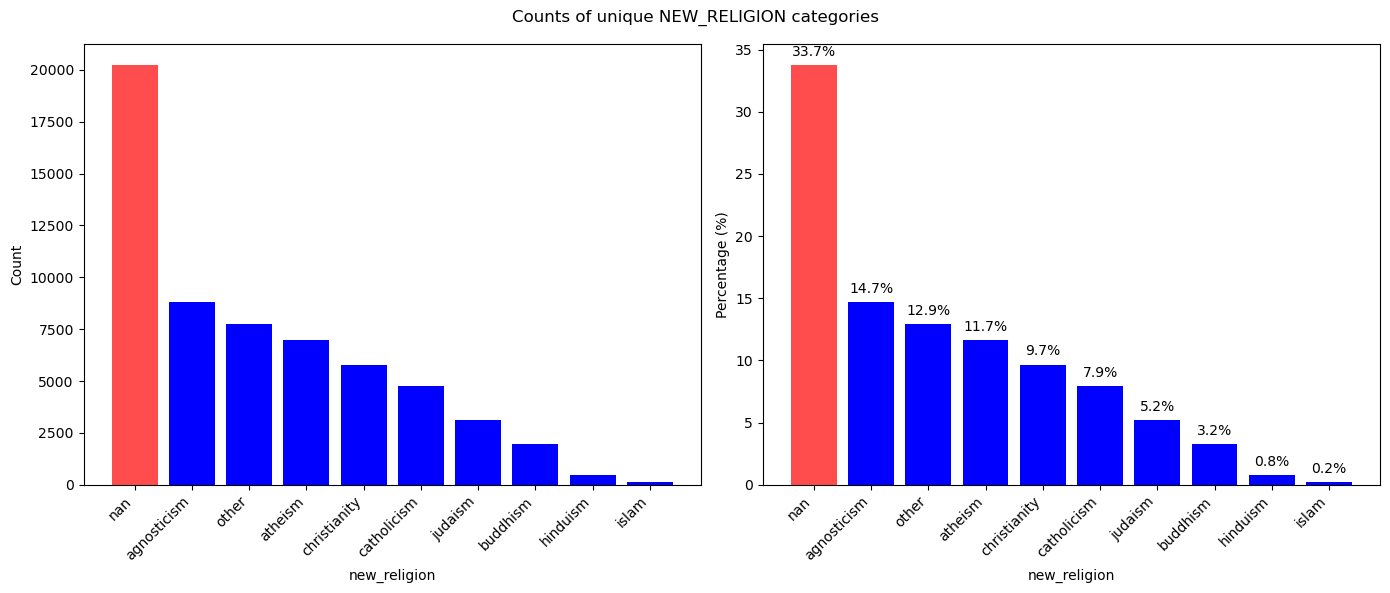

new_religion
NaN             20226
agnosticism      8812
other            7743
atheism          6985
christianity     5787
catholicism      4758
judaism          3098
buddhism         1948
hinduism          450
islam             139
Name: count, dtype: int64


C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


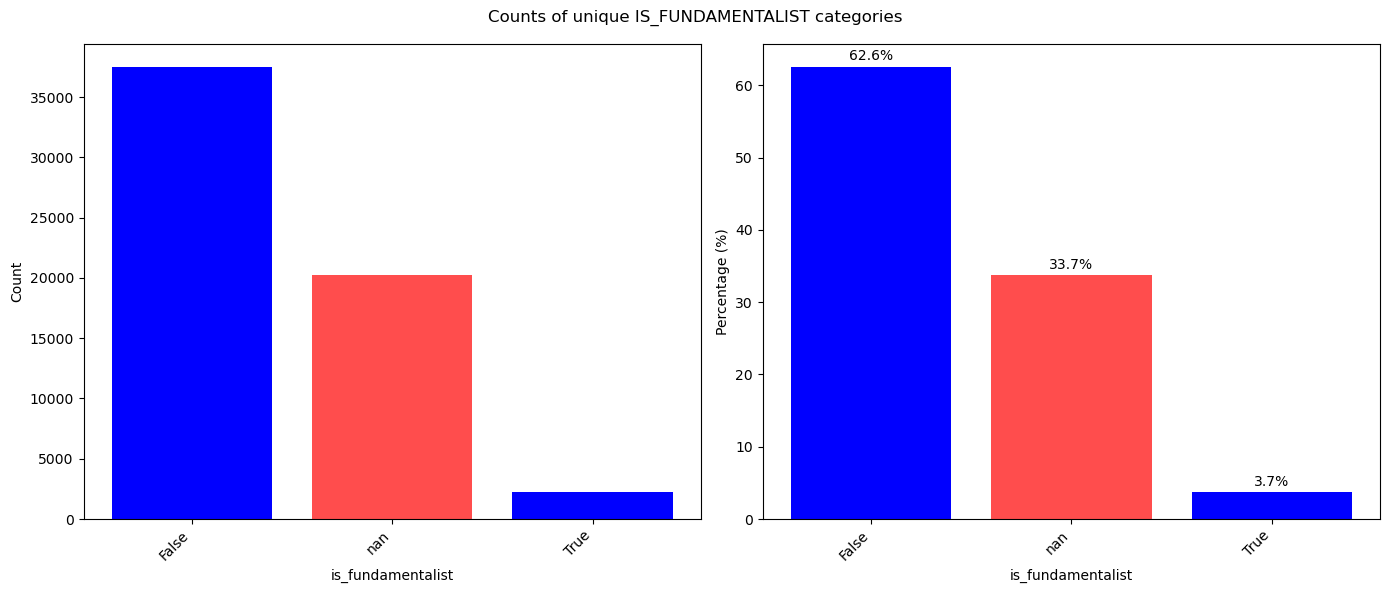

is_fundamentalist
False    37504
NaN      20226
True      2216
Name: count, dtype: int64


In [31]:
# religion feature - cleaning
def religion(record):
    if pd.isna(record):
        return np.nan
    return record.split(" ")[0]

def is_fundamentalist(record):
    if record in (True, False) or pd.isna(record):
        return record
    if "very serious about it" in record:
        return True
    else:
        return False

profiles_df["new_religion"] = profiles_df["religion"].apply(religion)
profiles_df["is_fundamentalist"] = profiles_df["religion"].apply(is_fundamentalist)

eda_categorical(profiles_df, "new_religion")
eda_categorical(profiles_df, "is_fundamentalist")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


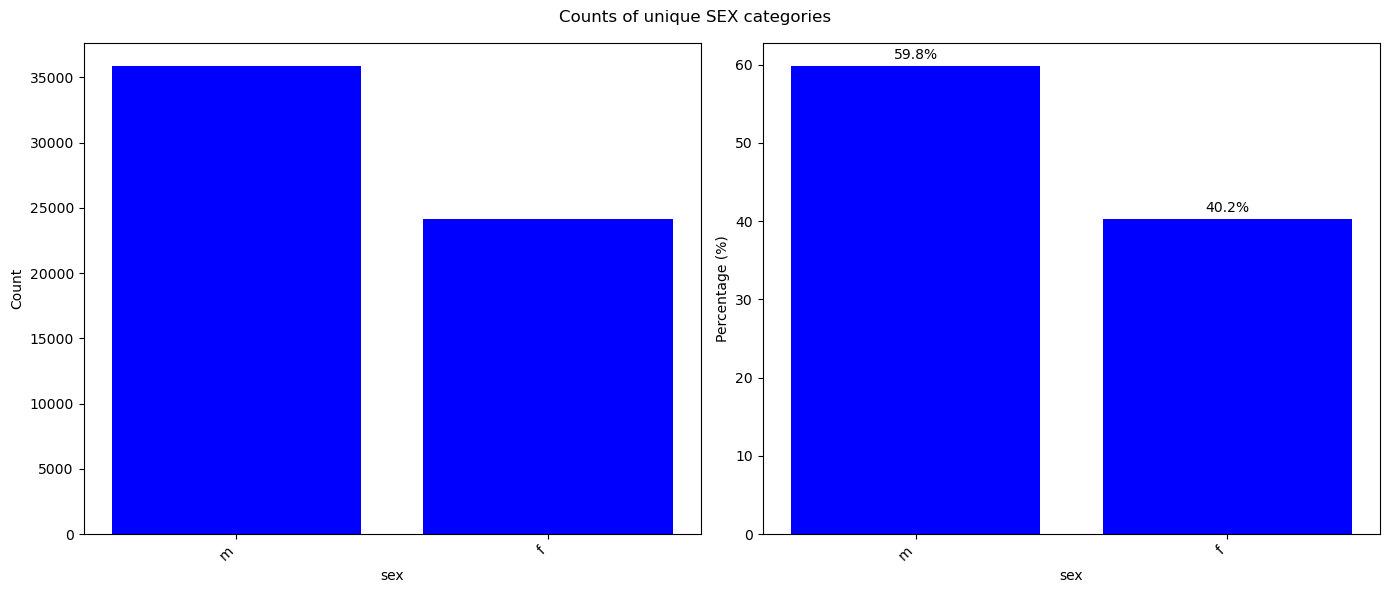

sex
m    35829
f    24117
Name: count, dtype: int64


In [32]:
# sex feature - exploratory analysis
# perfect, no cleaning necessary
eda_categorical(profiles_df, "sex")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


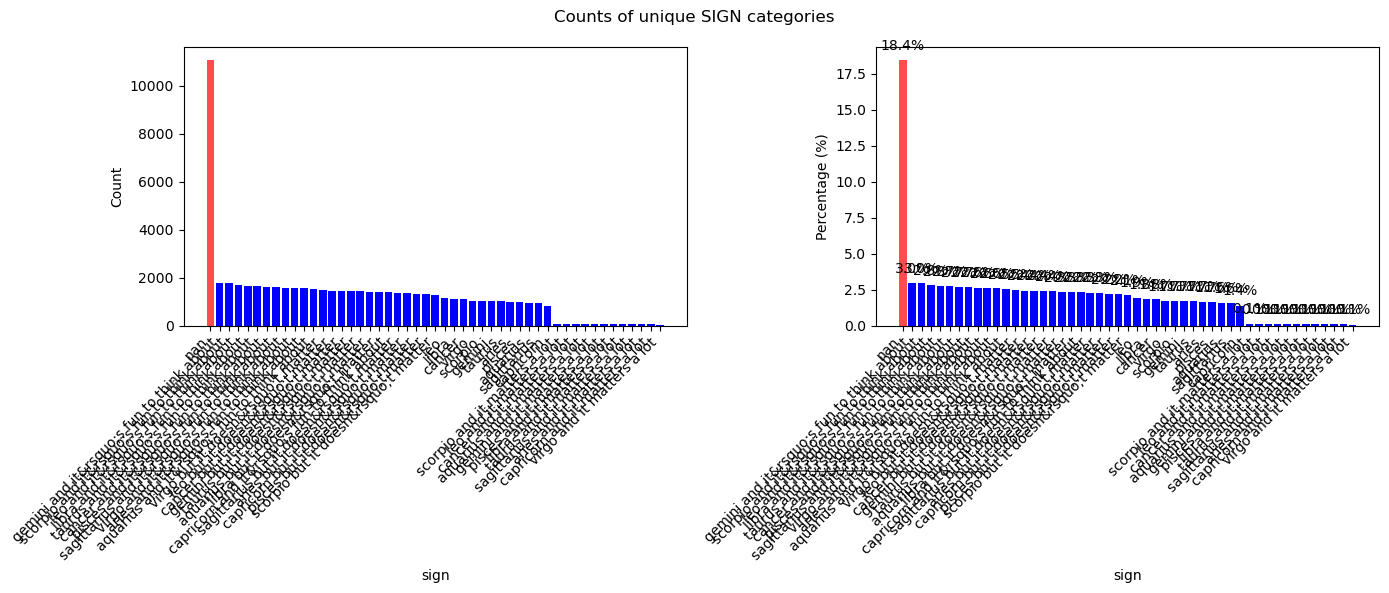

sign
NaN                                              11056
gemini and it&rsquo;s fun to think about          1782
scorpio and it&rsquo;s fun to think about         1772
leo and it&rsquo;s fun to think about             1692
libra and it&rsquo;s fun to think about           1649
taurus and it&rsquo;s fun to think about          1640
cancer and it&rsquo;s fun to think about          1597
pisces and it&rsquo;s fun to think about          1592
sagittarius and it&rsquo;s fun to think about     1583
virgo and it&rsquo;s fun to think about           1574
aries and it&rsquo;s fun to think about           1573
aquarius and it&rsquo;s fun to think about        1503
virgo but it doesn&rsquo;t matter                 1497
leo but it doesn&rsquo;t matter                   1457
cancer but it doesn&rsquo;t matter                1454
gemini but it doesn&rsquo;t matter                1453
taurus but it doesn&rsquo;t matter                1450
aquarius but it doesn&rsquo;t matter              1408
libra

In [33]:
# sign feature - exploratory analysis
eda_categorical(profiles_df, "sign")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


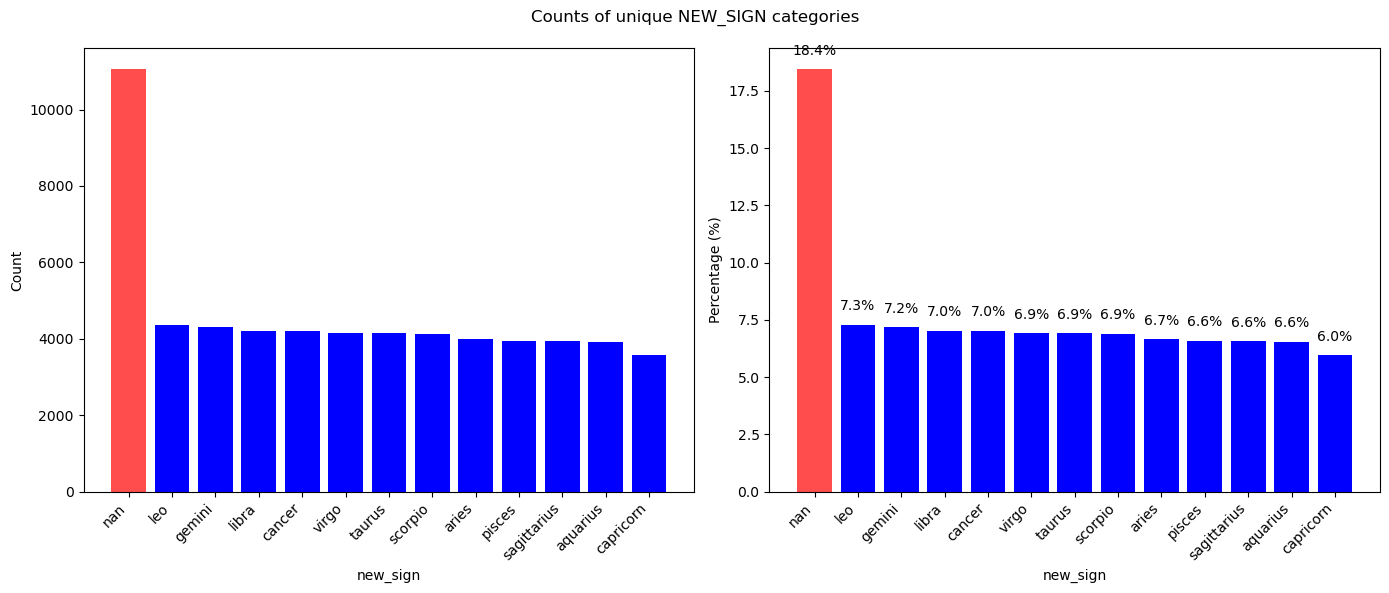

new_sign
NaN            11056
leo             4374
gemini          4310
libra           4207
cancer          4206
virgo           4141
taurus          4140
scorpio         4134
aries           3989
pisces          3946
sagittarius     3942
aquarius        3928
capricorn       3573
Name: count, dtype: int64


C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


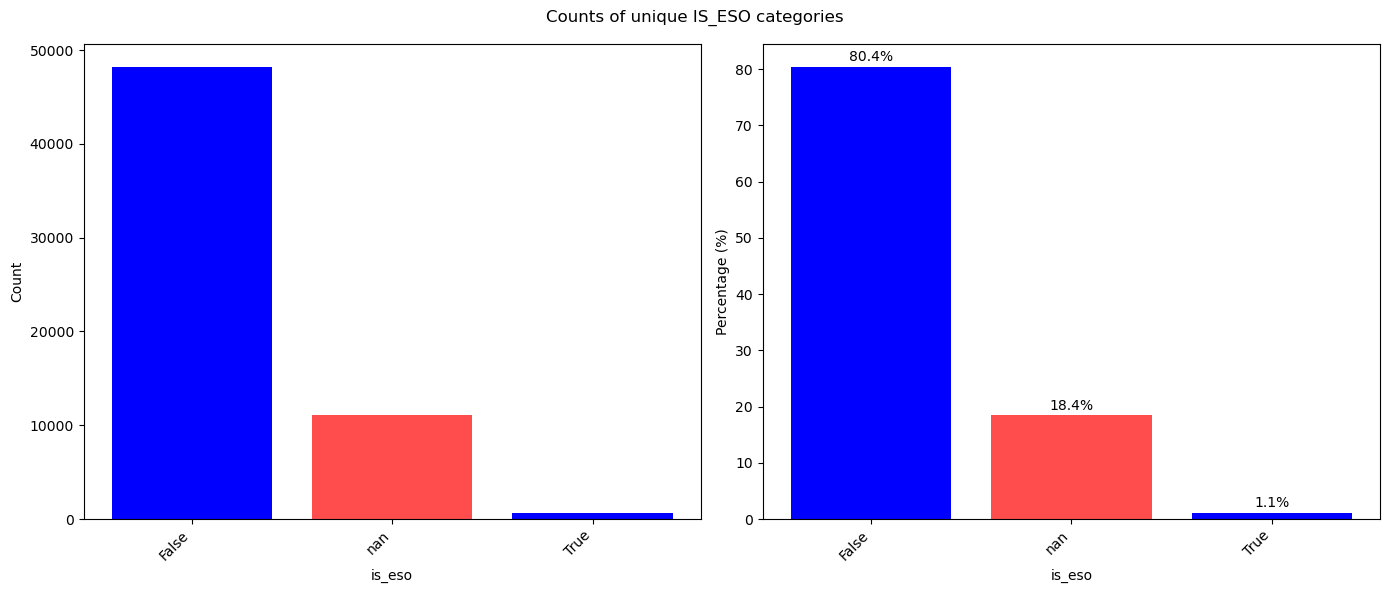

is_eso
False    48215
NaN      11056
True       675
Name: count, dtype: int64


In [34]:
# sign feature - cleaning
def sign(record):
    if pd.isna(record):
        return np.nan
    return record.split(" ")[0]

def is_eso(record):
    if record in (True, False) or pd.isna(record):
        return record
    if "it matters a lot" in record:
        return True
    else:
        return False

profiles_df["new_sign"] = profiles_df["sign"].apply(sign)
profiles_df["is_eso"] = profiles_df["sign"].apply(is_eso)

eda_categorical(profiles_df, "new_sign")
eda_categorical(profiles_df, "is_eso")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


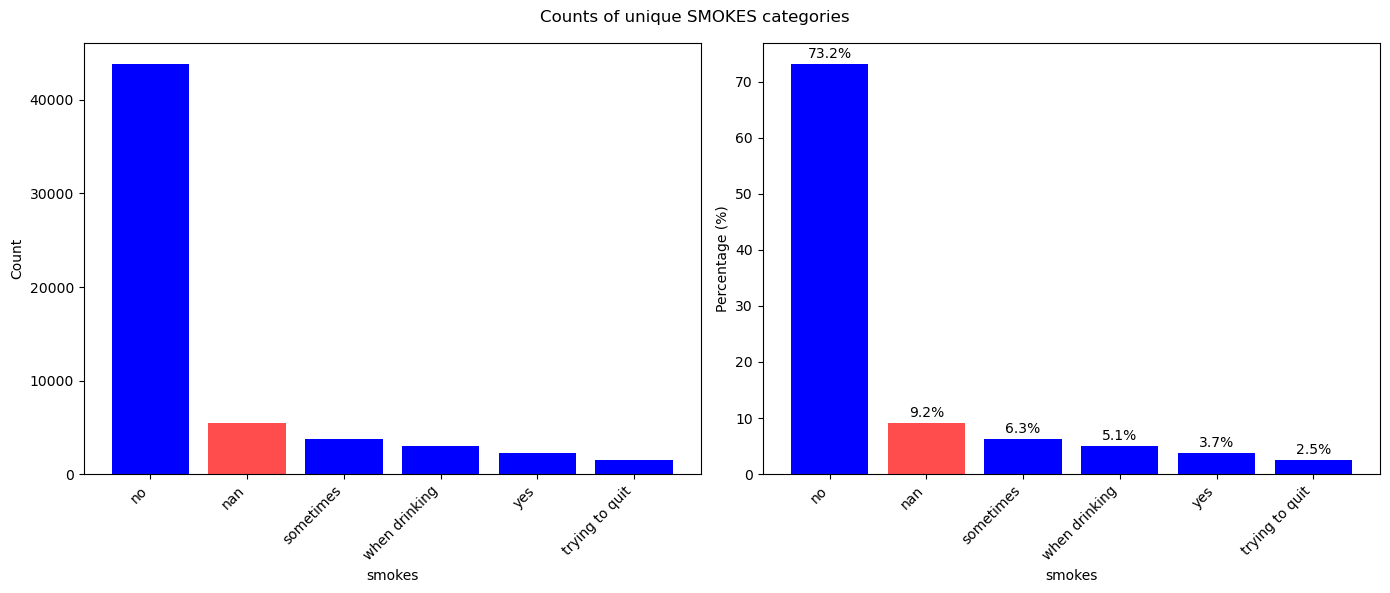

smokes
no                43896
NaN                5512
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: count, dtype: int64


In [35]:
# smokes feature - exploratory analysis and cleaning
# no cleaning for now
eda_categorical(profiles_df, "smokes")

In [36]:
# speaks feature - exploratory analysis and cleaning
#eda_categorical(profiles_df, "speaks")

def extract_languages(record):
    if pd.isna(record):
        return np.nan
    languages = [part.split("(")[0].strip() for part in record.split(",")]
    return set(languages)
    
def extract_levels(record):
    if pd.isna(record):
        return np.nan
    languages = [part.split("(")[0].strip() for part in record.split(",")]
    return set(languages)

from collections import Counter 

resulting_set = Counter()
for record in profiles_df["speaks"]:
    if pd.isna(record):
        continue
    resulting_set += Counter(extract_languages(record))
print(resulting_set)

# language will be used in retrospect, when individuals are matched with each other, to confirm the match

Counter({'english': 59896, 'spanish': 16312, 'french': 7851, 'chinese': 3660, 'german': 3083, 'japanese': 2188, 'italian': 2181, 'c++': 1769, 'russian': 1282, 'portuguese': 1074, 'other': 873, 'sign language': 828, 'hebrew': 805, 'tagalog': 767, 'hindi': 751, 'arabic': 587, 'korean': 567, 'latin': 478, 'vietnamese': 400, 'lisp': 355, 'farsi': 315, 'swedish': 267, 'thai': 239, 'dutch': 238, 'yiddish': 209, 'greek': 207, 'ancient greek': 183, 'swahili': 172, 'polish': 157, 'turkish': 155, 'indonesian': 138, 'urdu': 132, 'irish': 129, 'czech': 125, 'danish': 124, 'esperanto': 117, 'tamil': 103, 'sanskrit': 102, 'norwegian': 95, 'hawaiian': 93, 'hungarian': 88, 'romanian': 88, 'afrikaans': 87, 'persian': 81, 'bengali': 76, 'catalan': 71, 'ukrainian': 70, 'serbian': 68, 'croatian': 62, 'khmer': 52, 'bulgarian': 50, 'icelandic': 48, 'malay': 47, 'finnish': 46, 'cebuano': 40, 'slovak': 33, 'basque': 29, 'welsh': 28, 'ilongo': 26, 'gujarati': 25, 'occitan': 25, 'maori': 21, 'mongolian': 21, 't

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


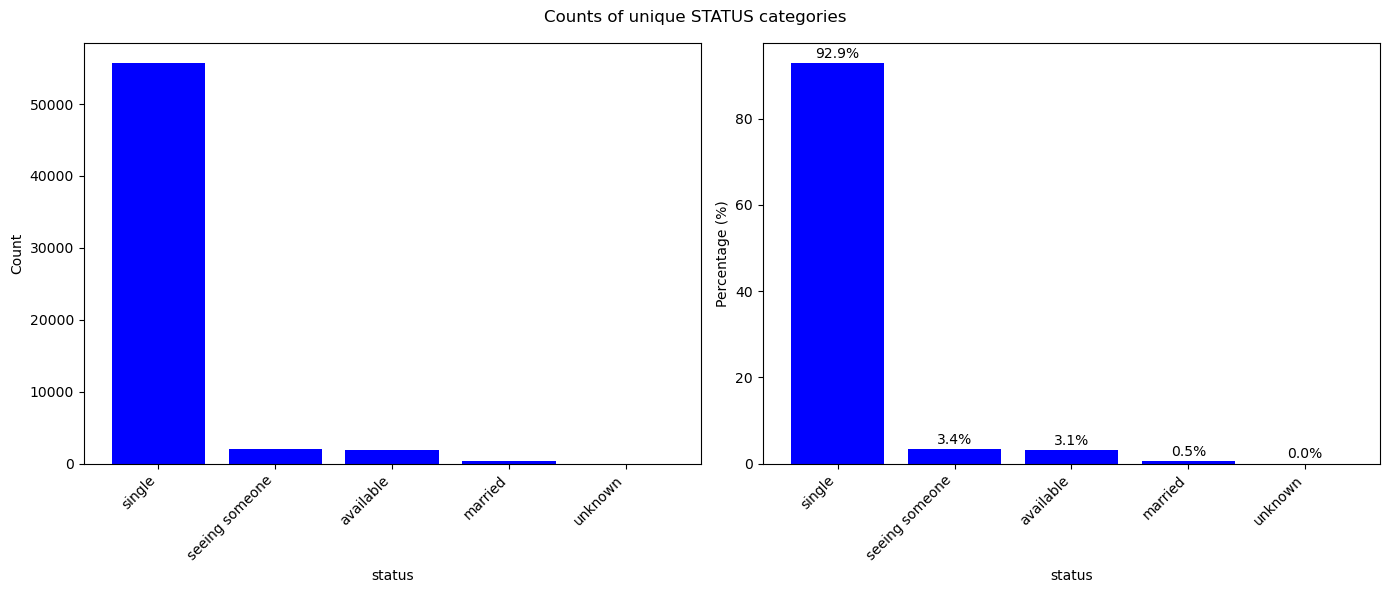

status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64


In [37]:
# status feature - exploratory analysis
eda_categorical(profiles_df, "status")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\423778153.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(percentages.index.astype(str), rotation=45, ha="right")


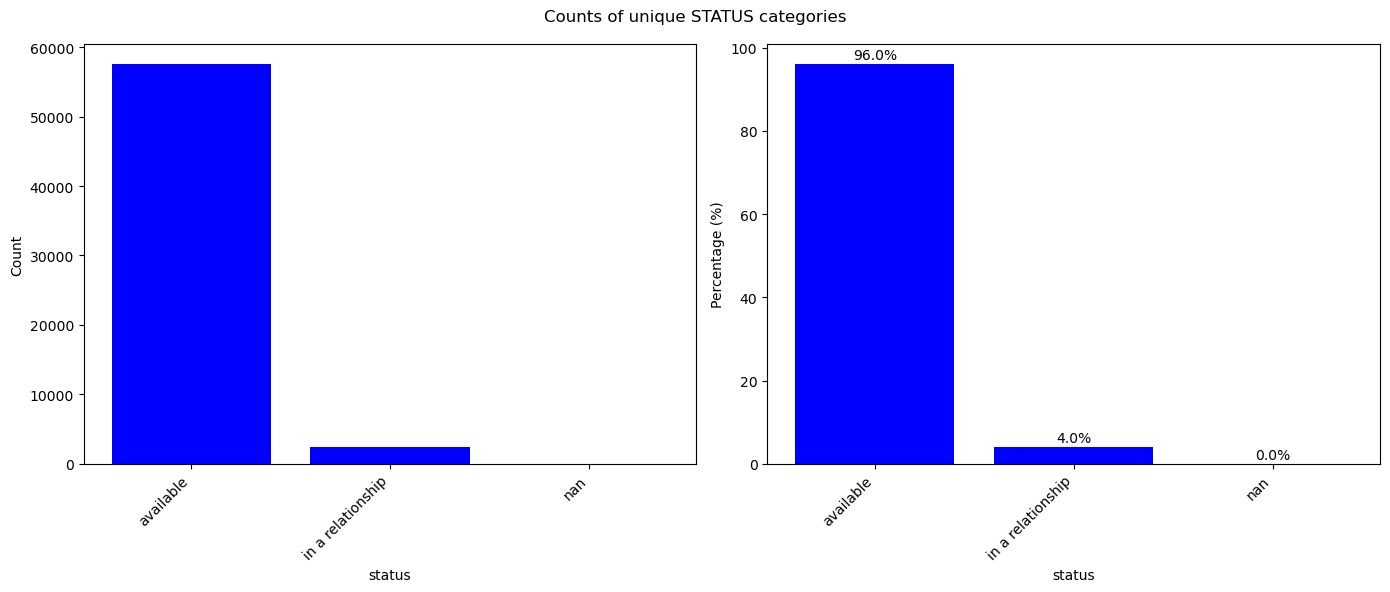

status
available            57562
in a relationship     2374
NaN                     10
Name: count, dtype: int64


In [38]:
# status feature - cleaning
# minor updates: merging "single" and "available", merging "married" and "seeing someone", replacing "unknown" with np.nan
profiles_df["status"] = profiles_df["status"].replace({"single": "available", "seeing someone": "in a relationship", "married": "in a relationship", "unknown": np.nan})
eda_categorical(profiles_df, "status")

#### Full Dataset

In [39]:
# show all features and missing values percentages
percent_missing = profiles_df.isnull().sum() * 100 / len(profiles_df)
missing_value_df = pd.DataFrame({'column_type': profiles_df.dtypes,
                                 'percent_missing': percent_missing})
missing_value_df

column_type  percent_missing
age                          int64         0.000000
body_type                   object         9.164915
diet                        object        40.694959
drinks                      object         4.979482
drugs                       object        23.487806
education                   object        11.056618
essay0                      object         9.154906
essay1                      object        12.631368
essay2                      object        16.077803
essay3                      object        19.143896
essay4                      object        17.577486
essay5                      object        18.099623
essay6                      object        22.972342
essay7                      object        20.770360
essay8                      object        32.070530
essay9                      object        21.023922
ethnicity                   object         9.475194
height                     float64         0.043372
income                     float64        80.809395
job                         object        13.675641
last_online                 object         0.000000
location                    object         0.000000
offspring                   object        59.321723
orientation                 object         0.000000
pets                        object        33.231575
religion                    object        33.740366
sex                         object         0.000000
sign                        object        18.443266
smokes                      object         9.194942
speaks                      object         0.083408
status                      object         0.016682
new_ethnicity               object         9.475194
days_since_last_online       int64         0.000000
has_kids                    object        64.883395
wants_more_kids             object        78.212058
new_pets                    object        33.231575
new_religion                object        33.740366
is_fundamentalist           object        33.740366
new_sign                    object        18.443266
is_eso                      object        18.443266

### Statistical Analysis

Following the preliminary analysis above, several **potentially interesting questions** with available features have been identified beforehand:
* Are people with higher education less likely to be religiously strict? (education vs. religion)
* Are white people taller than others? (ethnicity vs. height) 
* Are older people less active on the app? (age vs. days_since_last_online)
* Do aquarius make more money? (sign vs. income)
* Are there fewer heterosexual people working in the military? (orientation vs. job)

#### *Are people with higher education less likely to be religiously strict? (education vs. religion)*

This relationship is best explored:
1. visually, for example using a stacked barchart showing the proportion of strict/non-strict believers in each group by religion.
2. with the Chi Squared test

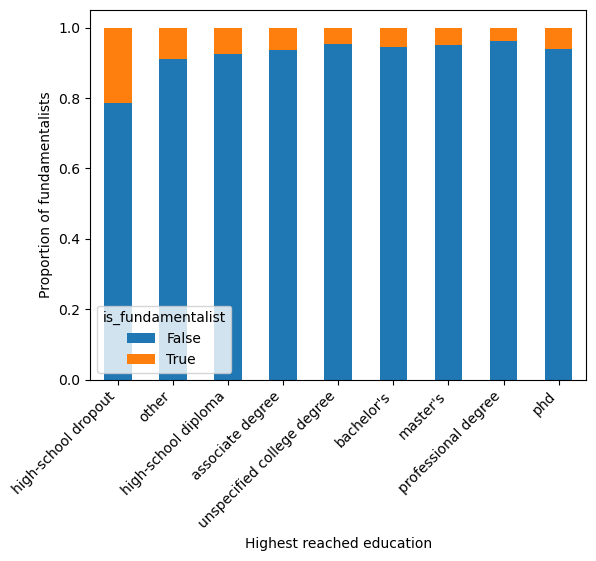

In [40]:
# visualization
df = profiles_df[["education", "is_fundamentalist"]][profiles_df['education'].notna() & profiles_df["is_fundamentalist"].notna()]
df2 = df.groupby(["education"]).value_counts(normalize=True).unstack()
edu_order = ["high-school dropout", "other", "high-school diploma", "associate degree", "unspecified college degree", "bachelor's", "master's", 
             "professional degree", "phd"]
df2_sorted = df2.reindex(edu_order)
#df2 = df.groupby("education")["is_fundamentalist"].value_counts(normalize=True).unstack(fill_value=0)
#df2_sorted = df2.sort_values(by=True, ascending=False)


df2_sorted.plot.bar(rot=0, stacked=True)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Highest reached education")
plt.ylabel("Proportion of fundamentalists")
plt.show()
plt.close()

In [41]:
# chi squared test
null_hyp = "Null hypothesis: There are no differences between classes of the education feature."
alternative_hyp = "Alternative hypothesis: There is some difference between classes of the education feature."

print(null_hyp)
print(alternative_hyp)

df = profiles_df[["education", "is_fundamentalist"]][profiles_df['education'].notna() & profiles_df["is_fundamentalist"].notna()]
df2 = pd.crosstab(df["education"], df["is_fundamentalist"])

stat, p, dof, freq = chi2_contingency(df2)

significance_threshold = 0.05

if p > significance_threshold:
    print(f"Due to the p-value {p}, the null hypothesis is accepted.")
else:
    print(f"Due to the p-value {p}, the null hypothesis is rejected.")

Null hypothesis: There are no differences between classes of the education feature.
Alternative hypothesis: There is some difference between classes of the education feature.
Due to the p-value 4.600258412936825e-31, the null hypothesis is rejected.


#### *Are white people taller than others? (ethnicity vs. height)*
Numerical differences between categories are best explored:
1. visually with a boxplot
2. with ANOVA tests

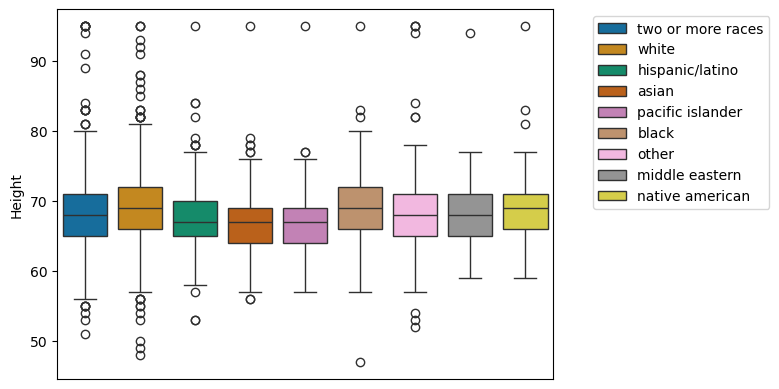

In [42]:
# visualisation
df = profiles_df[["new_ethnicity", "height"]][profiles_df["new_ethnicity"].notna() & profiles_df["height"].notna()]

sns.boxplot(data=df, x="new_ethnicity", y="height", hue="new_ethnicity", palette="colorblind", legend="brief")
plt.xticks([])
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right')
plt.xlabel("")
plt.ylabel("Height")
plt.show()
plt.close()

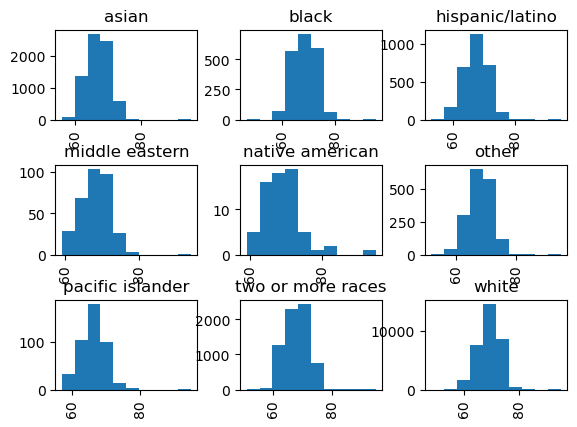

There are groups, which are statistically significantly different from the others.
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
            asian             black   1.8363    0.0  1.5365   2.136   True
            asian   hispanic/latino    0.611    0.0  0.3472  0.8748   True
            asian    middle eastern    1.303    0.0  0.6335  1.9725   True
            asian   native american   2.6076    0.0  1.1501  4.0651   True
            asian             other   1.4848    0.0  1.1647  1.8048   True
            asian  pacific islander  -0.2789 0.8694 -0.8671  0.3094  False
            asian two or more races   1.4011    0.0  1.2008  1.6014   True
            asian             white   2.1485    0.0   1.994  2.3029   True
            black   hispanic/latino  -1.2253    0.0 -1.5721 -0.8784   True
            black

In [43]:
# ANOVA + Tukey's Range Test
# Before running ANOVA, several assumptions must be verified: normality, and homeoscedasticity
# normality, OK; homeoscedasticity, all groups have similar variances, OK
df.hist(column="height", by="new_ethnicity")
plt.show()
plt.close()

# the test
from scipy.stats import f_oneway, tukey_hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#ethnicities = []
#for eth in df["new_ethnicity"].unique():
#    eth_data = df[df["new_ethnicity"] == eth]["height"]
#    ethnicities.append(list(eth_data))

asian = df[df["new_ethnicity"] == "asian"]["height"]
black = df[df["new_ethnicity"] == "black"]["height"]
hispanic = df[df["new_ethnicity"] == "hispanic/latino"]["height"]
me = df[df["new_ethnicity"] == "middle eastern"]["height"]
na = df[df["new_ethnicity"] == "native american"]["height"]
other = df[df["new_ethnicity"] == "other"]["height"]
pi = df[df["new_ethnicity"] == "pacific islander"]["height"]
multi = df[df["new_ethnicity"] == "two or more races"]["height"]
white = df[df["new_ethnicity"] == "white"]["height"]

stat, pval = f_oneway(asian, black, hispanic, me, na, other, pi, multi, white)

if pval > 0.05:
    print("No statistically significant difference between any two groups")
else:
    print("There are groups, which are statistically significantly different from the others.")
    #result = tukey_hsd(asian, black, hispanic, me, na, other, pi, multi, white)
    result = pairwise_tukeyhsd(endog=df["height"], groups=df["new_ethnicity"], alpha=0.05)
    print(result)

#### *Are older people less active on the app? (age vs. days_since_last_online)*
The relationship between two numerical variables verified:
1. visually with a scatter plot,
2. computationally by calculating correlation or covariance.

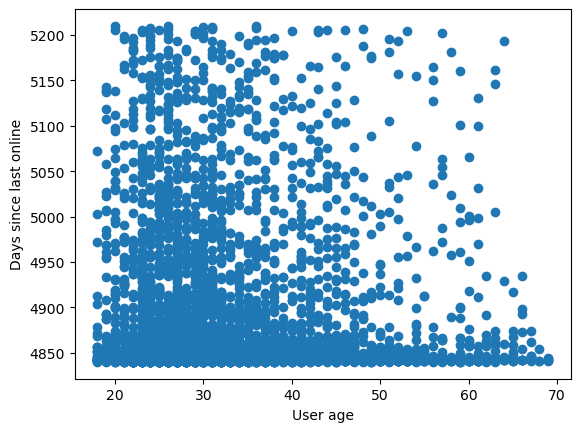

In [44]:
# visualisation
df = profiles_df[["age", "days_since_last_online"]][profiles_df["age"].notna() & profiles_df["days_since_last_online"].notna()]
df = df[df["age"] < 100].sample(frac=0.1)

plt.scatter(df["age"], df["days_since_last_online"])
plt.ylabel("Days since last online")
plt.xlabel("User age")
plt.show()
plt.close()

# The graph shows no correlation between the variables.

In [45]:
# correlation
from scipy.stats import pearsonr

#corr = profiles_df[["age", "days_since_last_online"]].corr(method='pearson')
stat, pval = pearsonr(profiles_df["age"], profiles_df["days_since_last_online"])
print(f"The correlation statistic is {stat}")

if stat > 0.5:
    print("There is positive correlation between age and days_since_last_online.")
elif stat < -0.5:
    print("There is negative correlation between age and days_since_last_online.")
else:
    print("There no correlation between age and days_since_last_online.")

The correlation statistic is -0.026180104502030985
There no correlation between age and days_since_last_online.


#### *Do aquarius make more money? (sign vs. income)*
Numerical differences between categories are best explored:
1. visually with a boxplot
2. with ANOVA tests

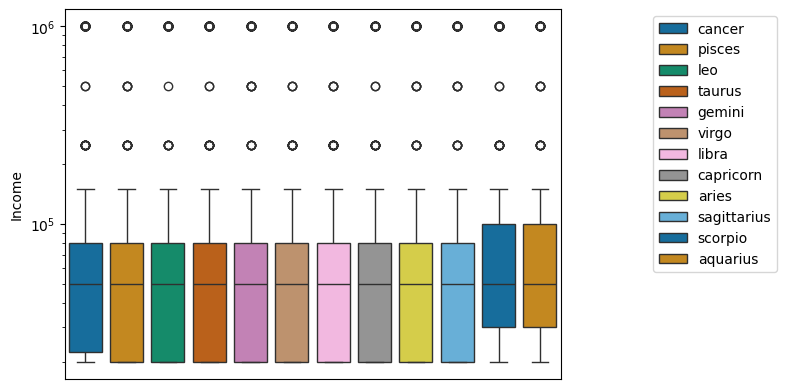

In [46]:
# visualisation
df = profiles_df[["new_sign", "income"]][profiles_df["new_sign"].notna() & profiles_df["income"].notna()]
df_quantile = df[df["income"] <= df["income"].quantile(1)]

sns.boxplot(data=df_quantile, x="new_sign", y="income", hue="new_sign", palette="colorblind", legend="brief")
plt.yscale("log")
plt.xticks([])
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right')
plt.xlabel("")
plt.ylabel("Income")
plt.show()
plt.close()

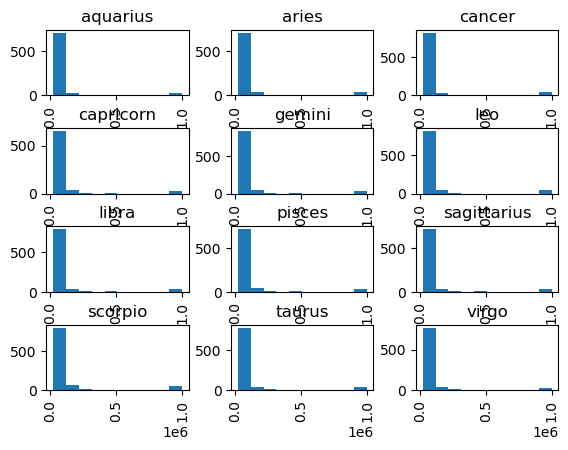

No statistically significant difference between any two groups


In [47]:
# ANOVA + Tukey's Range Test
# Before running ANOVA, several assumptions must be verified: normality, and homeoscedasticity
# normality, OK; homeoscedasticity, all groups have similar variances, OK
df.hist(column="income", by="new_sign")
plt.show()
plt.close()

# the test
from scipy.stats import f_oneway, tukey_hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#ethnicities = []
#for eth in df["new_ethnicity"].unique():
#    eth_data = df[df["new_ethnicity"] == eth]["height"]
#    ethnicities.append(list(eth_data))

ca = df_quantile[df_quantile["new_sign"] == "cancer"]["income"]
pi = df_quantile[df_quantile["new_sign"] == "pisces"]["income"]
le = df_quantile[df_quantile["new_sign"] == "leo"]["income"]
ta = df_quantile[df_quantile["new_sign"] == "taurus"]["income"]
ge = df_quantile[df_quantile["new_sign"] == "gemini"]["income"]
vi = df_quantile[df_quantile["new_sign"] == "virgo"]["income"]
li = df_quantile[df_quantile["new_sign"] == "libra"]["income"]
cn = df_quantile[df_quantile["new_sign"] == "capricorn"]["income"]
ar = df_quantile[df_quantile["new_sign"] == "aries"]["income"]
sa = df_quantile[df_quantile["new_sign"] == "sagittarius"]["income"]
sc = df_quantile[df_quantile["new_sign"] == "scorpio"]["income"]
aq = df_quantile[df_quantile["new_sign"] == "aquarius"]["income"]

stat, pval = f_oneway(ca, pi, le, ta, ge, vi, li, cn, ar, sa, sc, aq)

if pval > 0.05:
    print("No statistically significant difference between any two groups")
else:
    print("There are groups, which are statistically significantly different from the others.")
    #result = tukey_hsd(asian, black, hispanic, me, na, other, pi, multi, white)
    result = pairwise_tukeyhsd(endog=df["income"], groups=df["new_sign"], alpha=0.05)
    print(result)

#### *Are there fewer heterosexual people working in the military? (orientation vs. job)*
The relationship between two categorical variables can be evaluated:
1. visually with bar charts
2. numerically chi squared test

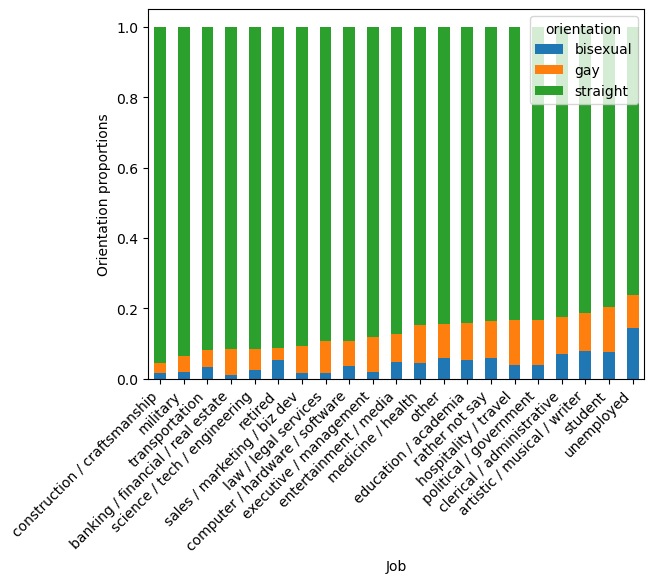

In [48]:
df = profiles_df[["orientation", "job"]][profiles_df['job'].notna() & profiles_df["orientation"].notna()]
#df2 = df.groupby(["job"]).value_counts(normalize=True).unstack()
df2 = df.groupby("job")["orientation"].value_counts(normalize=True).unstack(fill_value=0)
df2_sorted = df2.sort_values(by="straight", ascending=False)

df2_sorted.plot.bar(rot=0, stacked=True)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Job")
plt.ylabel("Orientation proportions")
plt.show()
plt.close()

In [49]:
# chi squared test
null_hyp = "Null hypothesis: There are no differences in orientation between classes of the job feature."
alternative_hyp = "Alternative hypothesis: There is some difference in orientation between classes of the job feature."

print(null_hyp)
print(alternative_hyp)

df = profiles_df[["job", "orientation"]][profiles_df['job'].notna() & profiles_df["orientation"].notna()]
df2 = pd.crosstab(df["job"], df["orientation"])

stat, p, dof, freq = chi2_contingency(df2)

significance_threshold = 0.05

if p > significance_threshold:
    print(f"Due to the p-value {p}, the null hypothesis is accepted.")
else:
    print(f"Due to the p-value {p}, the null hypothesis is rejected.")

Null hypothesis: There are no differences in orientation between classes of the job feature.
Alternative hypothesis: There is some difference in orientation between classes of the job feature.
Due to the p-value 8.26989406470949e-185, the null hypothesis is rejected.


In [50]:
print(profiles_df.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status',
       'new_ethnicity', 'days_since_last_online', 'has_kids',
       'wants_more_kids', 'new_pets', 'new_religion', 'is_fundamentalist',
       'new_sign', 'is_eso'],
      dtype='object')


## Machine Learning Problems
With insights gathered with the EDA, we will devise several problems to address. For the sake of variety, there should be problems involving more subgroups of machine learning - **both supervised (classification and regression) and unsupervised (clustering)**. The following are some possible brainstormed problems:
* What groups of mutually compatible users do we have? - *clustering*
* Can we predict, whether a user wants kids or not? - *classification*
* Can we predict a user's height? - *regression*

In [51]:
# We will work with a copied version of the datframe.
df = profiles_df.copy()

### What groups of mutually compatible users do we have? - *clustering*

In this problem we will use only some of the available features.<br>
<br>
Specifically:<br>
**age**, **body_type**, diet, drinks, drugs, education, height, income, *orientation*, *sex*, smokes, has_kids, wants_more_kids, new_pets, *new_religion*, *is_fundamentalist*.<br>
<br>
Features in *itallics* will be used to group the dataset beforehand, the others shall function as inputs to the ML model. Features in **bold** will be have increased weights (and importance). 

#### Feature Preprocessing
Normalization: age, income, height <br>
Ordinal encoding: body_type, education, new_pets (to arrange, that dog-enjoyers are closer to both-enjoyers, than cat-enjoyers)<br>
One-hot encoding: diet, drinks, drugs, smokes<br>
No encoding needed: has_kids, wants_more_kids<br>

0.0


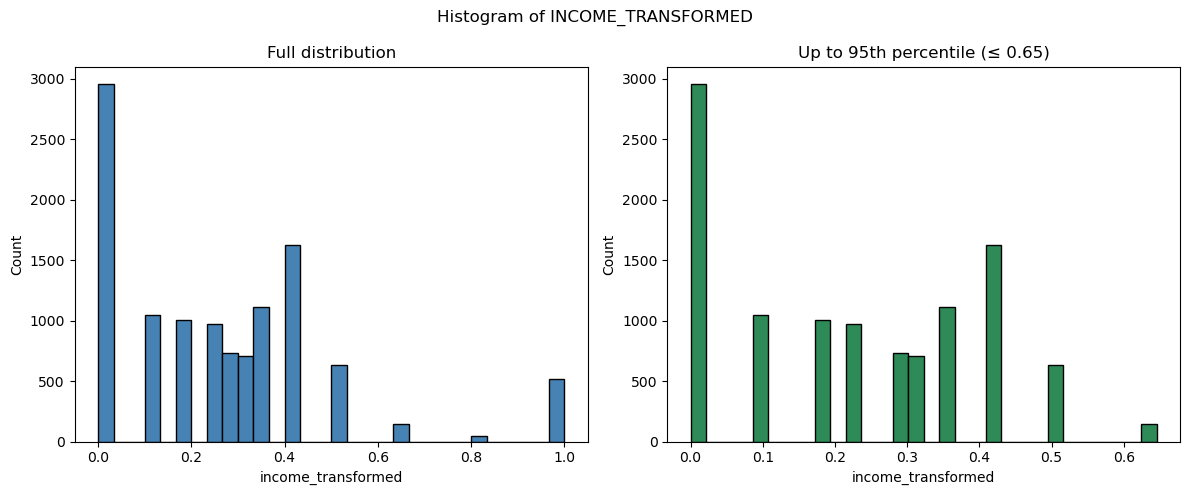

Mean: 0.3
Median: 0.2
Max: 1.0
Min: 0.0


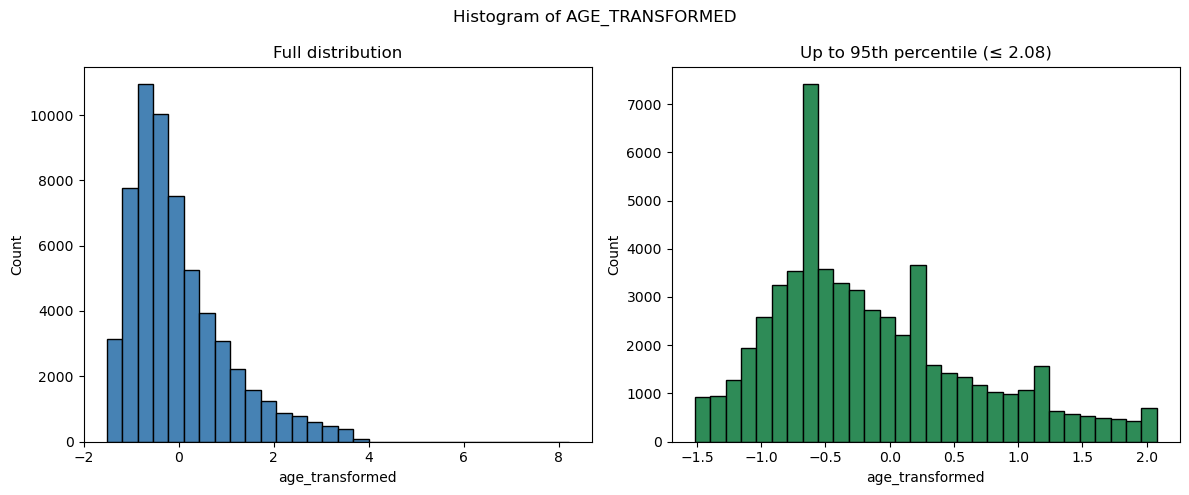

Mean: 0.0
Median: -0.2
Max: 8.21554271070559
Min: -1.5170448232057694


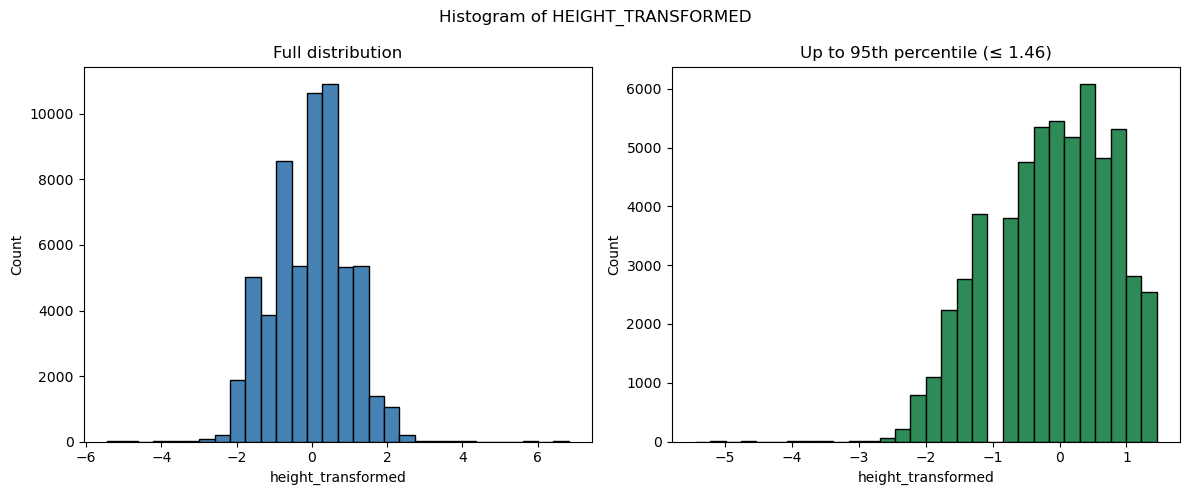

Mean: -0.0
Median: -0.1
Max: 6.82829094481788
Min: -5.452147143142769


In [59]:
# normalization
# features: age, income, height

number_missing = df['age'].isnull().sum()
percent_missing = round(number_missing / number_all * 100, 1)
print(percent_missing)

# income, log transformation and min-max normalization
df['income_transformed'] = np.log(df['income'])
df['income_transformed'] = (df['income_transformed'] - df['income_transformed'].min()) / (df['income_transformed'].max() - df['income_transformed'].min())
eda_numerical(df, "income_transformed")

# age, z-score normalization
df['age_transformed'] = (df['age'] - df['age'].mean()) / df['age'].std()
eda_numerical(df, "age_transformed")

# height, z-score normalization
df['height_transformed'] = (df['height'] - df['height'].mean()) / df['height'].std()
eda_numerical(df, "height_transformed")

C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\168311520.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['body_type_transformed'] = df['body_type'].replace(body_type_mapping)


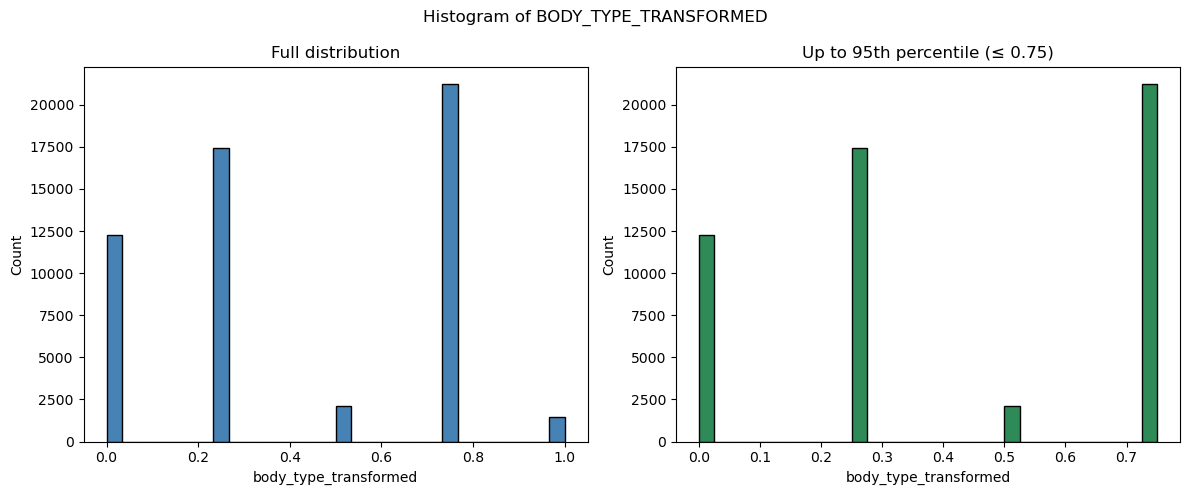

Mean: 0.4
Median: 0.2
Max: 1.0
Min: 0.0


C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\168311520.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education_transformed'] = df['education'].replace(education_mapping)


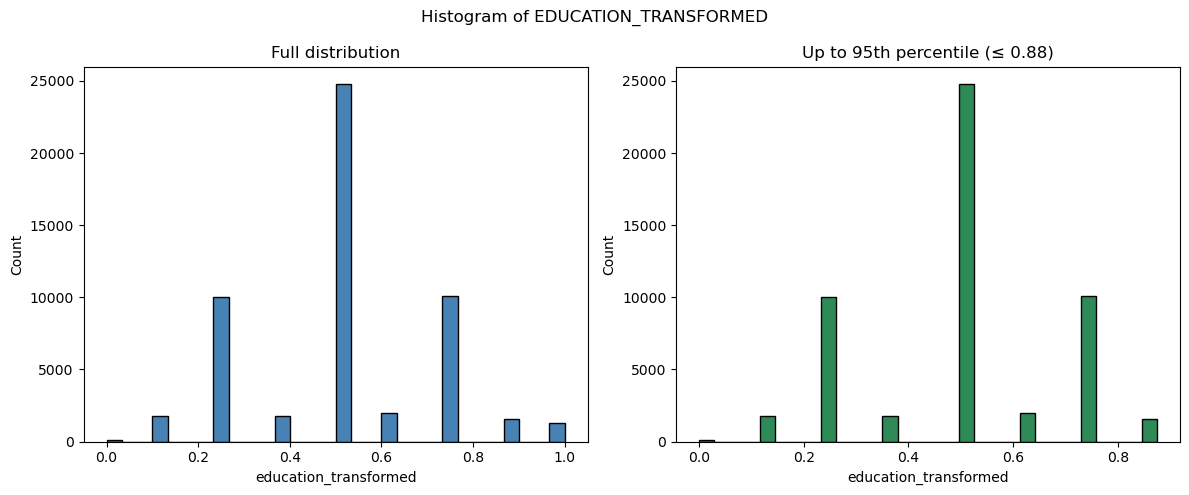

Mean: 0.5
Median: 0.5
Max: 1.0
Min: 0.0


C:\Users\jnlor\AppData\Local\Temp\ipykernel_20324\168311520.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['new_pets_transformed'] = df['new_pets'].replace(new_pets_mapping)


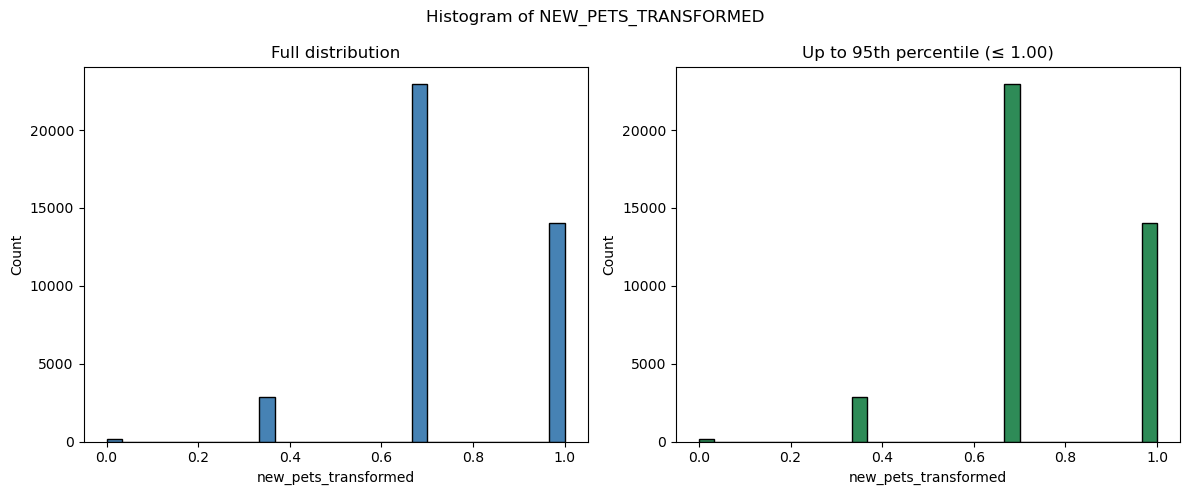

Mean: 0.8
Median: 0.7
Max: 1.0
Min: 0.0


In [55]:
# ordinal encoding
# features: body_type, education, new_pets

# body_type
body_type_mapping = {"excelent": 1, "good": 2, "weak": 3, "average": 4, "fat":5}
df['body_type_transformed'] = df['body_type'].replace(body_type_mapping)
df['body_type_transformed'] = (df['body_type_transformed'] - df['body_type_transformed'].min()) / (df['body_type_transformed'].max() - df['body_type_transformed'].min())

eda_numerical(df, "body_type_transformed")

# education
education_mapping = {'high-school dropout': 1, 'other': 2, 'high-school diploma': 3, 'associate degree': 4, 
                     'unspecified college degree': 5, "bachelor's": 6, "master's": 7, 'professional degree': 8, 'phd': 9}
df['education_transformed'] = df['education'].replace(education_mapping)
df['education_transformed'] = (df['education_transformed'] - df['education_transformed'].min()) / (df['education_transformed'].max() - df['education_transformed'].min())
eda_numerical(df, "education_transformed")

# new_pets
new_pets_mapping = {'cats': 1, 'both': 2, 'dogs': 3, 'neither': 0}
df['new_pets_transformed'] = df['new_pets'].replace(new_pets_mapping)
df['new_pets_transformed'] = (df['new_pets_transformed'] - df['new_pets_transformed'].min()) / (df['new_pets_transformed'].max() - df['new_pets_transformed'].min())
eda_numerical(df, "new_pets_transformed")

In [54]:
# one-hot encoding 

#diet, drinks, drugs, smokes
df = pd.get_dummies(df, columns=['diet', 'drinks', 'drugs', 'smokes'])
print(df.columns)

Index(['age', 'body_type', 'education', 'essay0', 'essay1', 'essay2', 'essay3',
       'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'speaks', 'status',
       'new_ethnicity', 'days_since_last_online', 'has_kids',
       'wants_more_kids', 'new_pets', 'new_religion', 'is_fundamentalist',
       'new_sign', 'is_eso', 'income_transformed', 'age_transformed',
       'height_transformed', 'body_type_transformed', 'education_transformed',
       'new_pets_transformed', 'diet_anything', 'diet_halal', 'diet_kosher',
       'diet_other', 'diet_vegan', 'diet_vegetarian', 'drinks_desperately',
       'drinks_not at all', 'drinks_often', 'drinks_rarely', 'drinks_socially',
       'drinks_very often', 'drugs_never', 'drugs_often', 'drugs_sometimes',
       'smokes_no', 'smokes_sometimes', 'smokes_trying to quit',
       'smokes_when drinking

#### Imputation of Missing Values
Before training the model, though, we need to address the issue of missing values in the dataset. There are two basic approaches - and their pros and cons:
* discared entire rows containing missing values - simple; however, with large information loss
* imputation (inserting missing values infered from the known data) - better in terms of information retention; however, puts us at risk of influencing the result; imputation can be divided further
    * univariate - missing values is infered from other values in the imputed variable
    * multivariate - missing value is infered based on rows' similarity in other variables

Below, we will test several possible imputation methods offered by the pandas library.

In [69]:
features = ['income_transformed', 'age_transformed', 'height_transformed', 'body_type_transformed', 'education_transformed', 
            'new_pets_transformed', 'diet_anything', 'diet_halal', 'diet_kosher', 'diet_other', 'diet_vegan', 'diet_vegetarian', 
            'drinks_desperately', 'drinks_not at all', 'drinks_often', 'drinks_rarely', 'drinks_socially', 'drinks_very often', 'drugs_never', 
            'drugs_often', 'drugs_sometimes', 'smokes_no', 'smokes_sometimes', 'smokes_trying to quit', 'smokes_when drinking', 'smokes_yes']

# first, look at proportions of missing values for each feature 
percent_missing = df[features].isnull().sum() * 100 / len(df[features])
missing_value_df = pd.DataFrame({'column_type': df[features].dtypes,
                                 'percent_missing': percent_missing,
                                 'mean': df[features].mean()})
missing_value_df

# impute
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df[features])

df[features] = imp.transform(df[features])

percent_missing = df[features].isnull().sum() * 100 / len(df[features])
missing_value_df = pd.DataFrame({'column_type': df[features].dtypes,
                                 'percent_missing': percent_missing,
                                 'mean': df[features].mean()})
missing_value_df

column_type  percent_missing          mean
income_transformed        float64              0.0  2.599482e-01
age_transformed           float64              0.0  1.754251e-16
height_transformed        float64              0.0 -1.323985e-15
body_type_transformed     float64              0.0  4.183180e-01
education_transformed     float64              0.0  5.107890e-01
new_pets_transformed      float64              0.0  7.569019e-01
diet_anything             float64              0.0  4.651019e-01
diet_halal                float64              0.0  1.284489e-03
diet_kosher               float64              0.0  1.918393e-03
diet_other                float64              0.0  2.986021e-02
diet_vegan                float64              0.0  1.171054e-02
diet_vegetarian           float64              0.0  8.317486e-02
drinks_desperately        float64              0.0  5.371501e-03
drinks_not at all         float64              0.0  5.449905e-02
drinks_often              float64              0.0  8.614420e-02
drinks_rarely             float64              0.0  9.937277e-02
drinks_socially           float64              0.0  6.969606e-01
drinks_very often         float64              0.0  7.857071e-03
drugs_never               float64              0.0  6.292997e-01
drugs_often               float64              0.0  6.839489e-03
drugs_sometimes           float64              0.0  1.289828e-01
smokes_no                 float64              0.0  7.322590e-01
smokes_sometimes          float64              0.0  6.317352e-02
smokes_trying to quit     float64              0.0  2.468889e-02
smokes_when drinking      float64              0.0  5.071231e-02
smokes_yes                float64              0.0  3.721683e-02

#### Model Training
In terms of clustering, we have these available (basic) algorithms:
* k-means clusternig
* others to be researched

In [70]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df[features], test_size=0.7)

model = KMeans(n_clusters = 5, random_state=0)
model.fit(x_train)

KMeans(n_clusters=5, random_state=0)

#### Manual Grouping
On top of the trained clusters, we shall manually create groups of users to make sure, incompatible users are not matched together. Those groups were created based on preselected features - *new_religion, is_fundamentalist, sex, and orientation*. The logic behind this thought process was - there must be mutual sexual attraction between the matched users, and users, who take religion seriously, would not likely pick a user of a different faith.